In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

In [3]:
plt.style.use('seaborn-bright')

In [131]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Reduced_Socio_features_with_clusters.csv")

In [132]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

## Filling null values

In [133]:
cat_cols = ["BB_Categorical","PEO_TV_Categorical","IDD_INCOMING_Categorical","IDD_OUTGOING_Categorical",
            "ONNET_OUTGOING_Categorical","OFFNET_OUTGOING_Categorical","ONNET_INCOMING_Categorical",
            "Sub_Update_Status","Sub_Update",
            "OFFNET_INCOMING_Categorical","IDD_incoming_country","IDD_outgoing_country","IDD_Overall_Categorical",
            "Location_Identifier","GENDER","Voice_VAS_Month_Subscribed","BB_VAS_Month_Subscribed", "VOICE_Categorical",
            "Peo_VAS_Month_Subscribed","Other_VAS_Month_Subscribed","BB_Extra_GB_Purchase_Categorical",
            "Peo_TV_Package","Voice_VAS_Package","BB_VAS_Package","Other_VAS_Package",
            "Having_Insurance","Having_Senior_Citizen","Having_Kids_at_Home","Having_Teenagers_Students",
            "Having_Working_Professionals","Having_Family_Member_Abroad","Tamil_Customer"]

In [134]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [135]:
user_profile["KMOD_3_Cluster"].value_counts()

1    1367
2     875
0     758
Name: KMOD_3_Cluster, dtype: int64

<AxesSubplot:ylabel='KMOD_3_Cluster'>

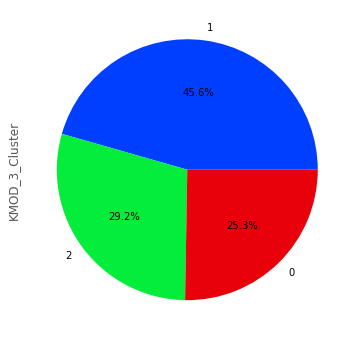

In [136]:
user_profile["KMOD_3_Cluster"].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

# Cluster analysis - Cluster 2

In [137]:
cluster_2 = user_profile[(user_profile["KMOD_3_Cluster"]==2)]

In [138]:
cluster_2.describe()

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
count             875.000000             853.000000              856.000000   
mean                0.096449               0.099581                0.102088   
std                 0.089997               0.090835                0.095912   
min                 0.001202               0.001202                0.001202   
25%                 0.023940               0.023867                0.027644   
50%                 0.068093               0.071257                0.075488   
75%                 0.150020               0.155391                0.150602   
max                 0.599588               0.692651                0.643887   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count              867.000000           418.000000           126.000000   
mean                 0.113359             0.078146             0.107054   
std                  0.087752             0.143312             0.174102   
min                  0.001202             0.002500             0.004808   
25%                  0.038523             0.005833             0.013221   
50%                  0.101526             0.017500             0.038462   
75%                  0.164757             0.073208             0.110176   
max                  0.589596             0.838667             0.833333   

       IDD_outgoing_Cumulative_Revenue  PEO_TV_Scaled   BB_Scaled  \
count                     1.260000e+02     869.000000  522.000000   
mean                      7.895350e+05       0.665514    0.384968   
std                       1.967165e+06       0.269174    0.251061   
min                       8.170000e+02       0.000000    0.005208   
25%                       2.427250e+04       0.537500    0.185764   
50%                       1.463000e+05       0.712500    0.340278   
75%                       5.822265e+05       0.887500    0.546875   
max                       1.342376e+07       0.975000    1.000000   

        BIRTH_YEAR  ...  Peo_Packages_if_Kids  \
count   751.000000  ...            875.000000   
mean   1965.356858  ...              0.001600   
std      14.991658  ...              0.017827   
min    1900.000000  ...              0.000000   
25%    1956.000000  ...              0.000000   
50%    1966.000000  ...              0.000000   
75%    1976.000000  ...              0.000000   
max    2000.000000  ...              0.200000   

       Peo_Packages_if_Teenager_Students  \
count                         875.000000   
mean                            0.004114   
std                             0.028405   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             0.200000   

       Peo_Package_if_Working_Professionals  VAS_if_Kids  \
count                            875.000000   875.000000   
mean                               0.009371     0.009371   
std                                0.042291     0.071460   
min                                0.000000     0.000000   
25%                                0.000000     0.000000   
50%                                0.000000     0.000000   
75%                                0.000000     0.000000   
max                                0.200000     1.000000   

       VAS_if_Teenager_Students  VAS_if_Working_Professionals  \
count                875.000000                    875.000000   
mean                   0.069486                      0.059771   
std                    0.145392                      0.124094   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.000000                      0.000000   
max                    0.700000                      0.750000   

       IDD_if_Family_Member_Abr

#### Exceptional (Outlier Usage)

In [14]:
cluster_2.iloc[:,[4,7,10,13,16,20,26,28,62]].boxplot(figsize=(10,7),rot=90)

<AxesSubplot:>

### Exceptional Users (Outliers) analysis

In [15]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

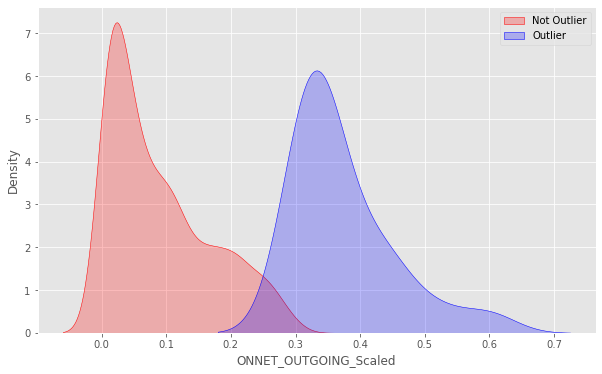

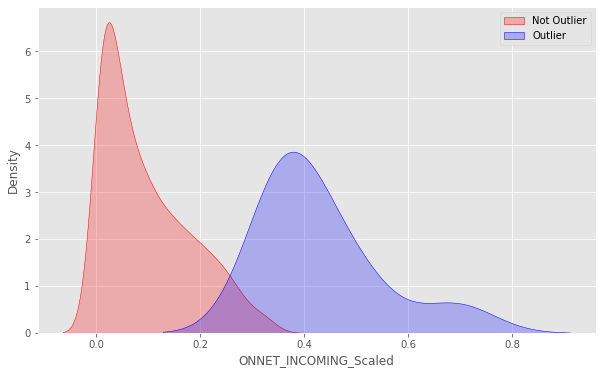

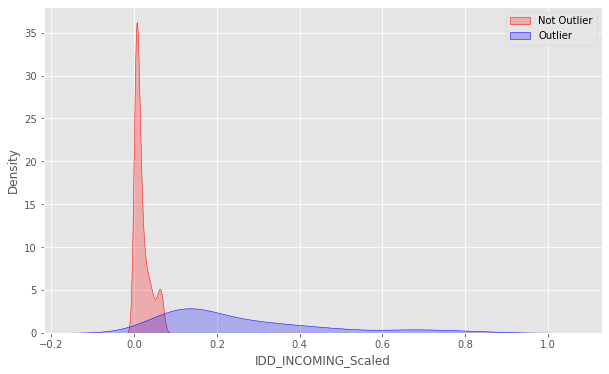

In [16]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_2[scaled_cols[i]][(cluster_2[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_2[scaled_cols[i]][(cluster_2[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [17]:
# Voice Outliers
cluster_2_out = cluster_2[(cluster_2["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_2["ONNET_INCOMING_Outlier"]=="YES") | (cluster_2["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_2["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_2["IDD_OUTGOING_Outlier"]=="YES") | (cluster_2["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

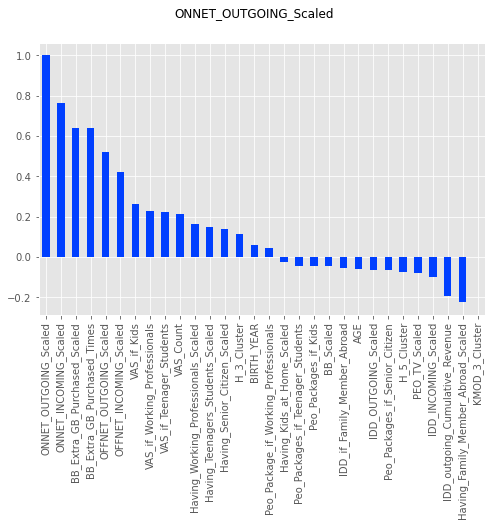

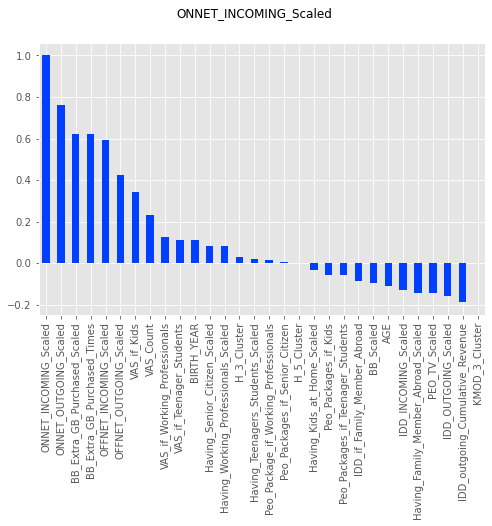

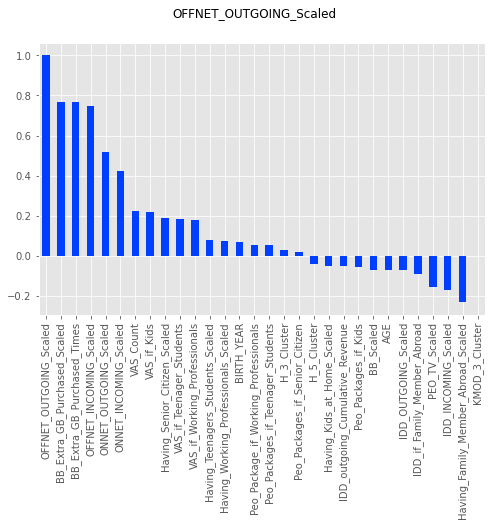

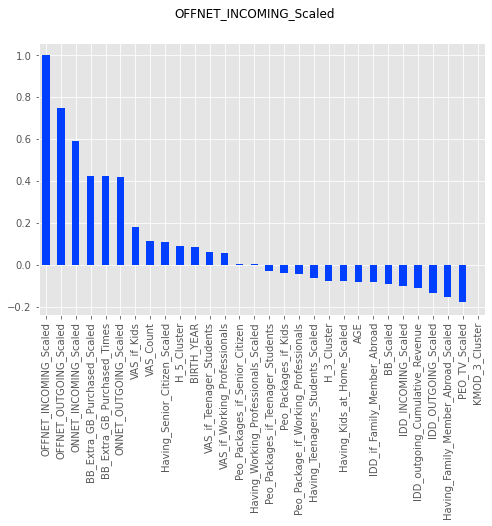

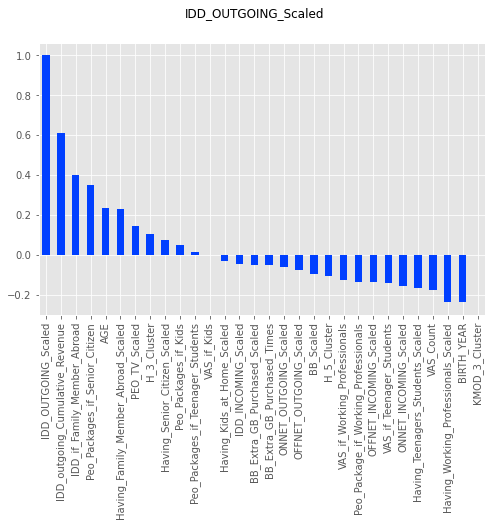

In [18]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_2_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [19]:
cluster_2_out_sub_df = pd.DataFrame([dict(cluster_2["Sub_Type"].value_counts()),dict(cluster_2_out["Sub_Type"].value_counts())])

In [20]:
cluster_2_out_sub_df

TRIPLE_PLAY  DOUBLE_PLAY_PV  DOUBLE_PLAY_BV  SINGLE_PLAY
0          749              88              30          8.0
1          130              12               7          NaN

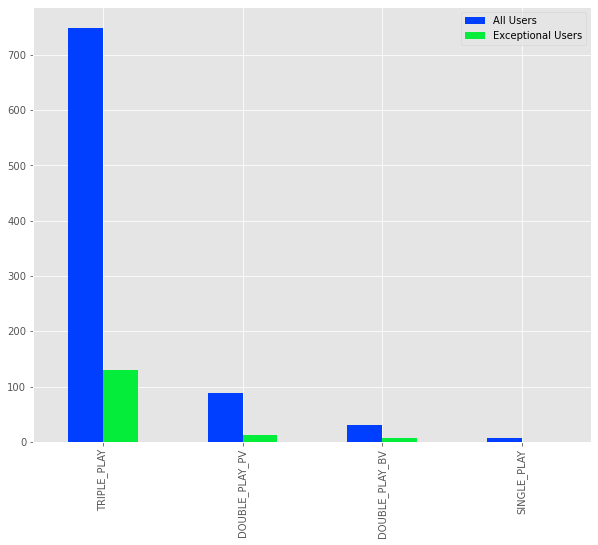

In [21]:
fig, ax = plt.subplots()
cluster_2_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

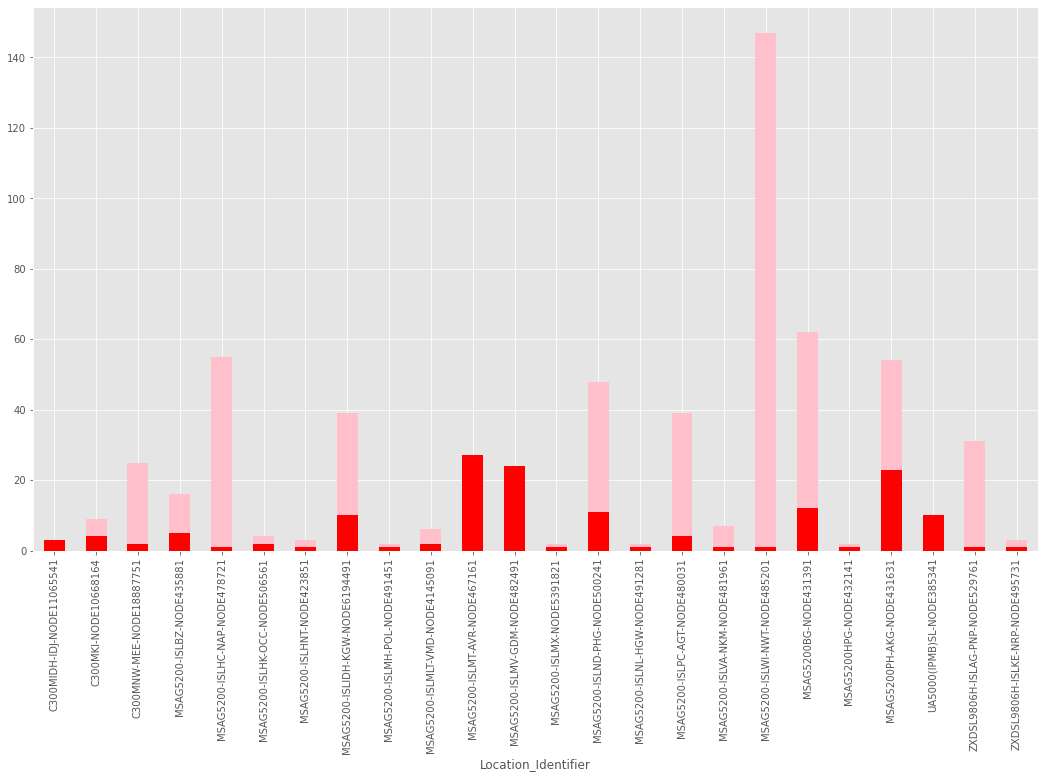

In [22]:
cluster_2_loc = cluster_2.groupby('Location_Identifier').count()["event_source.hash"]
cluster_2_out_loc = cluster_2_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_2_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_2_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

#### Skewness and Distribution

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

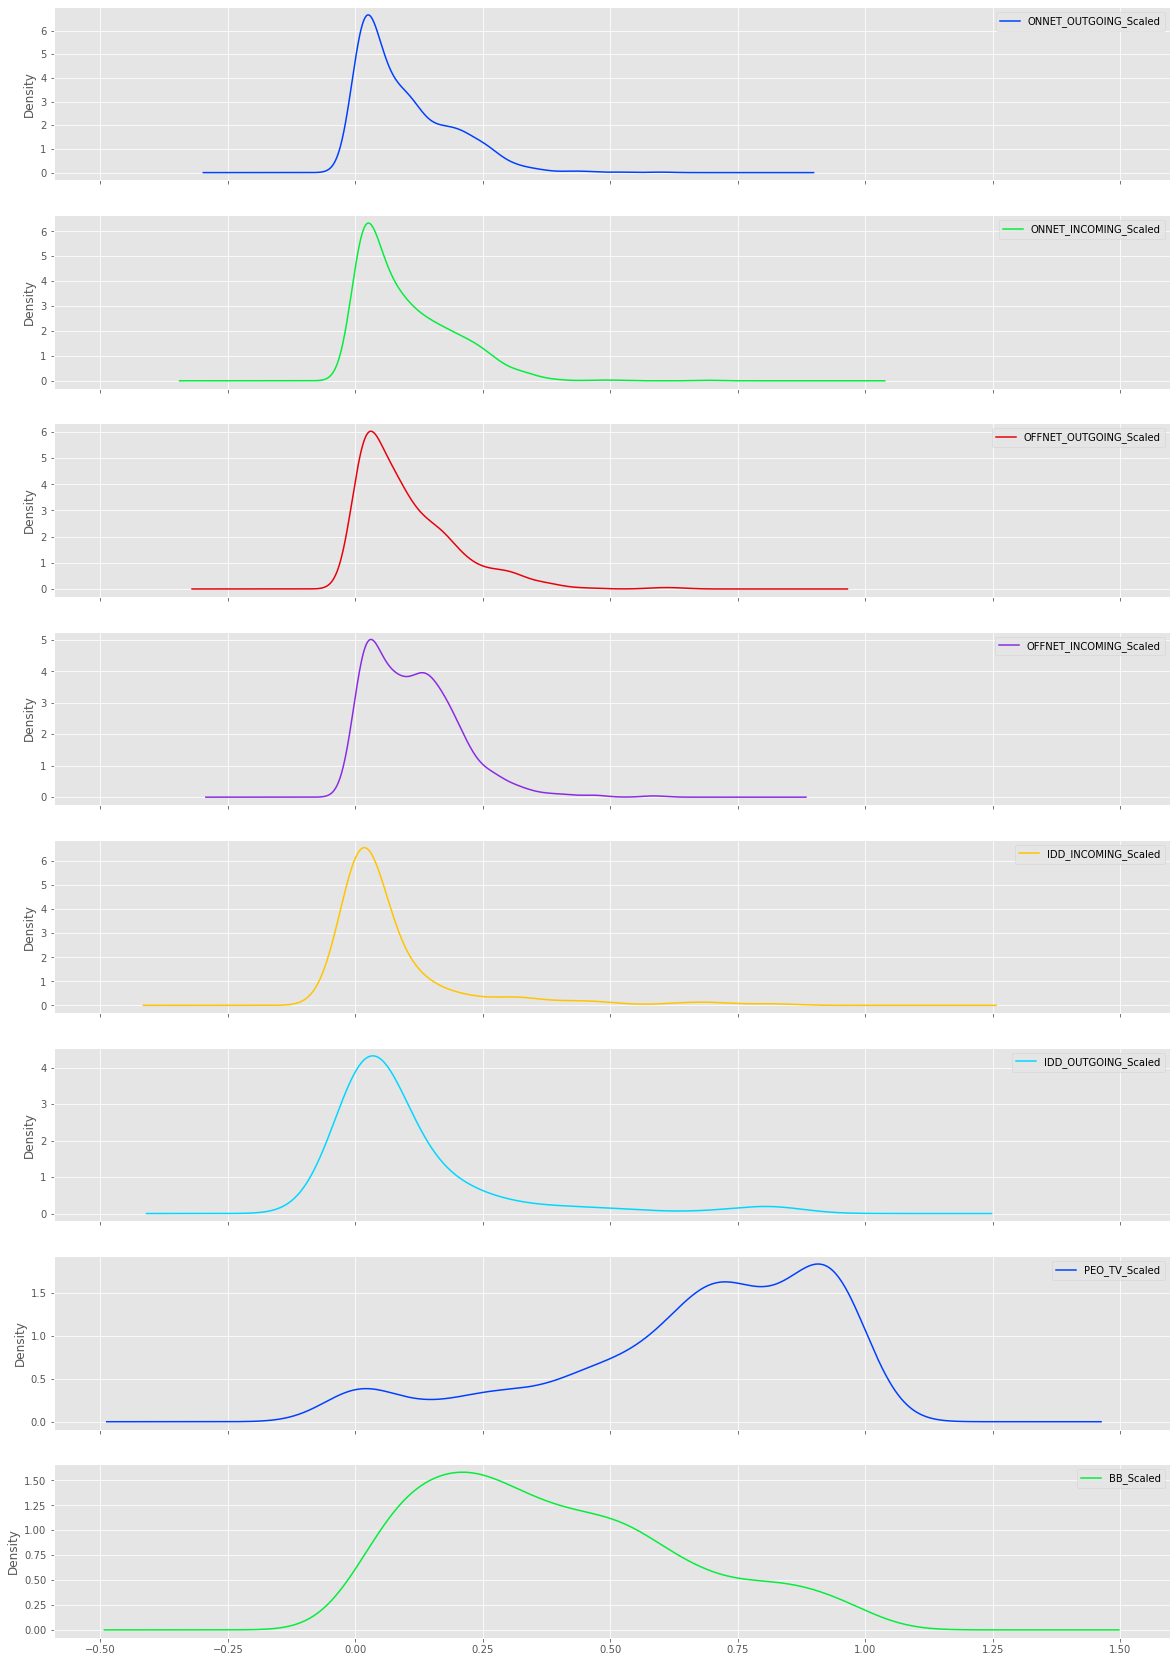

In [23]:
cluster_2.iloc[:,[4,7,10,13,16,20,26,28,62]].plot.kde(figsize=(20,30),subplots=True)

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>],
       [<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'VAS_Count'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Times'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Senior_Citizen_Scaled'}>],
       [<AxesSubplot:title={'center':'Having_Kids_at_Home_Scaled'}>,
 

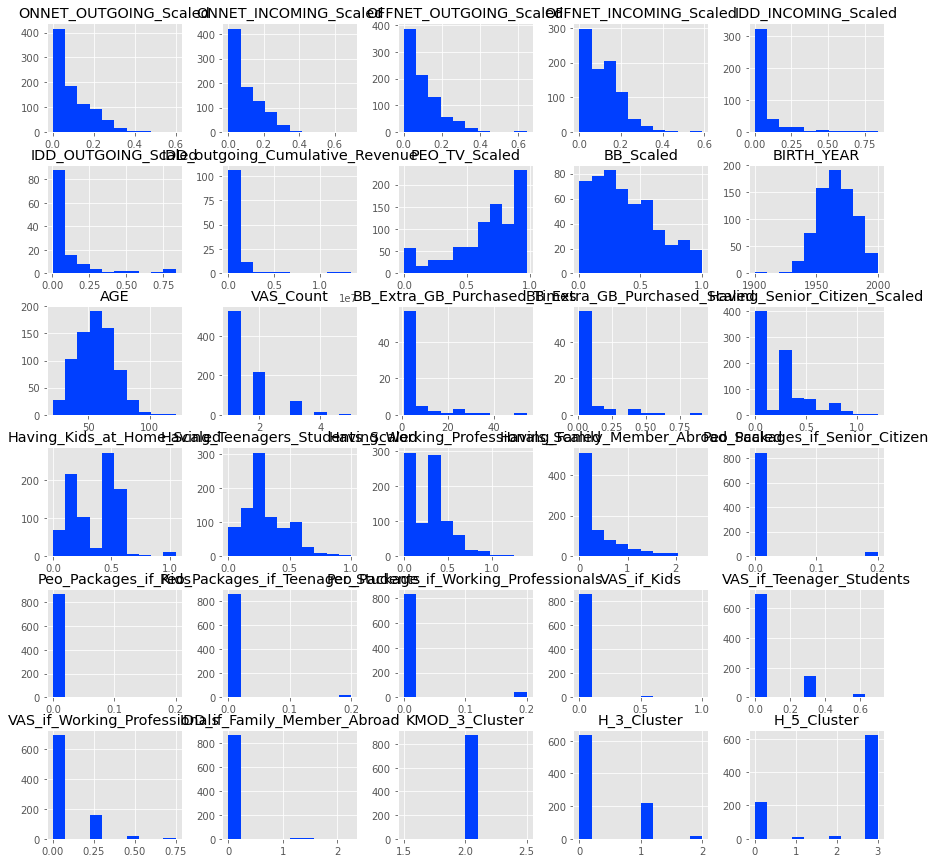

In [24]:
cluster_2.hist(figsize=(15,15))

### Subscription Type and Usage

In [25]:
cluster_2["Sub_Type"].value_counts()

TRIPLE_PLAY       749
DOUBLE_PLAY_PV     88
DOUBLE_PLAY_BV     30
SINGLE_PLAY         8
Name: Sub_Type, dtype: int64

In [26]:
cluster_2["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

<AxesSubplot:ylabel='Sub_Type'>

In [27]:
len(cluster_2[(cluster_2["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

875

In [28]:
ax =cluster_2[(cluster_2["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Subscription state

####  Subscription: Assumed vs. Actual

<AxesSubplot:ylabel='Sub_Type_State'>

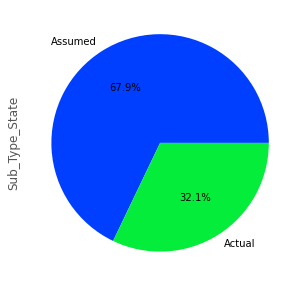

In [139]:
cluster_2["Sub_Type_State"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%')

In [140]:
cluster_2["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

<AxesSubplot:ylabel='Sub_Update_Status'>

<AxesSubplot:ylabel='Sub_Update_Status'>

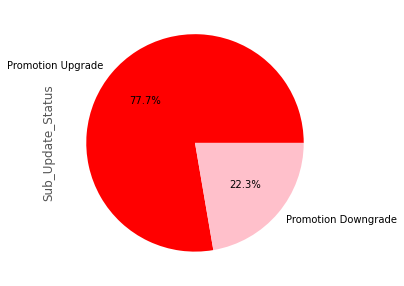

In [143]:
cluster_2[(cluster_2["Sub_Update_Status"]!= "NO_INFO")]["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

<AxesSubplot:ylabel='Sub_Update'>

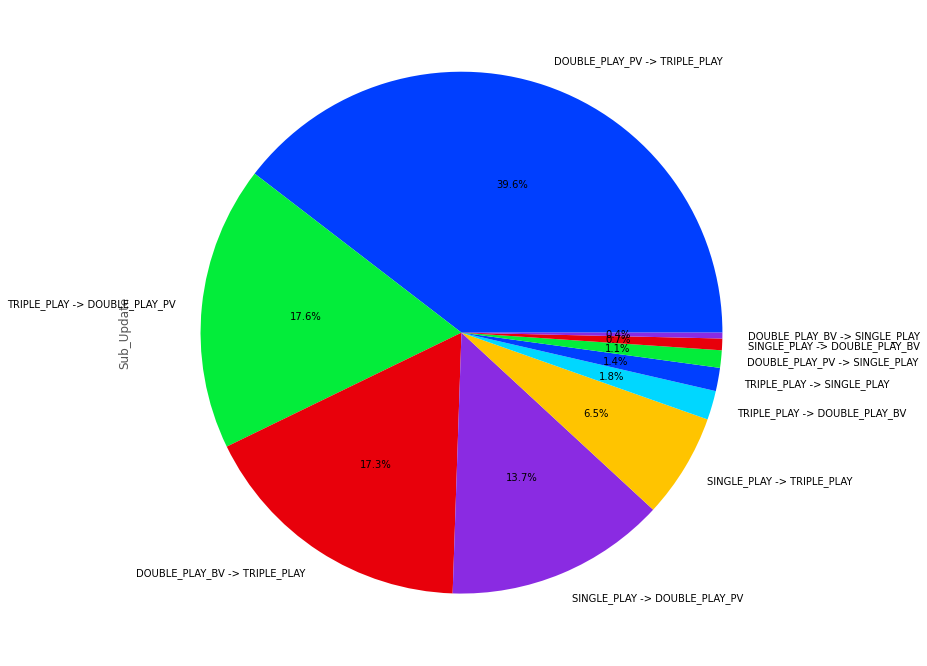

In [141]:
cluster_2[(cluster_2["Sub_Update"] !="NO_INFO")]["Sub_Update"].value_counts().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%')

### Voice Calls Usage

In [29]:
cluster_2["VOICE_Categorical"].value_counts()

LOW        662
MEDIUM     179
HIGH        18
NO_INFO     16
Name: VOICE_Categorical, dtype: int64

In [30]:
cluster_2["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','green','red'] )

<AxesSubplot:ylabel='VOICE_Categorical'>

### VOICE VAS Packages

In [33]:
count_dict = dict(cluster_2["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

In [34]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [35]:
cluster_2["IDD_Overall_Categorical"].value_counts()

NO_INFO    443
LOW        421
MEDIUM      10
HIGH         1
Name: IDD_Overall_Categorical, dtype: int64

In [37]:
cluster_2["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','pink','yellow','green'] )

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

#### IDD Calling country analysis

In [38]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [39]:
cluster_2_idd_country_df = cluster_2[["event_source.hash","IDD_incoming_country"]]

In [40]:
cluster_2_idd_country_df["IDD_incoming_country"] = cluster_2_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-40-2b17a12cb9b9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
cluster_2_idd_country_df = cluster_2_idd_country_df.explode("IDD_incoming_country")

<AxesSubplot:>

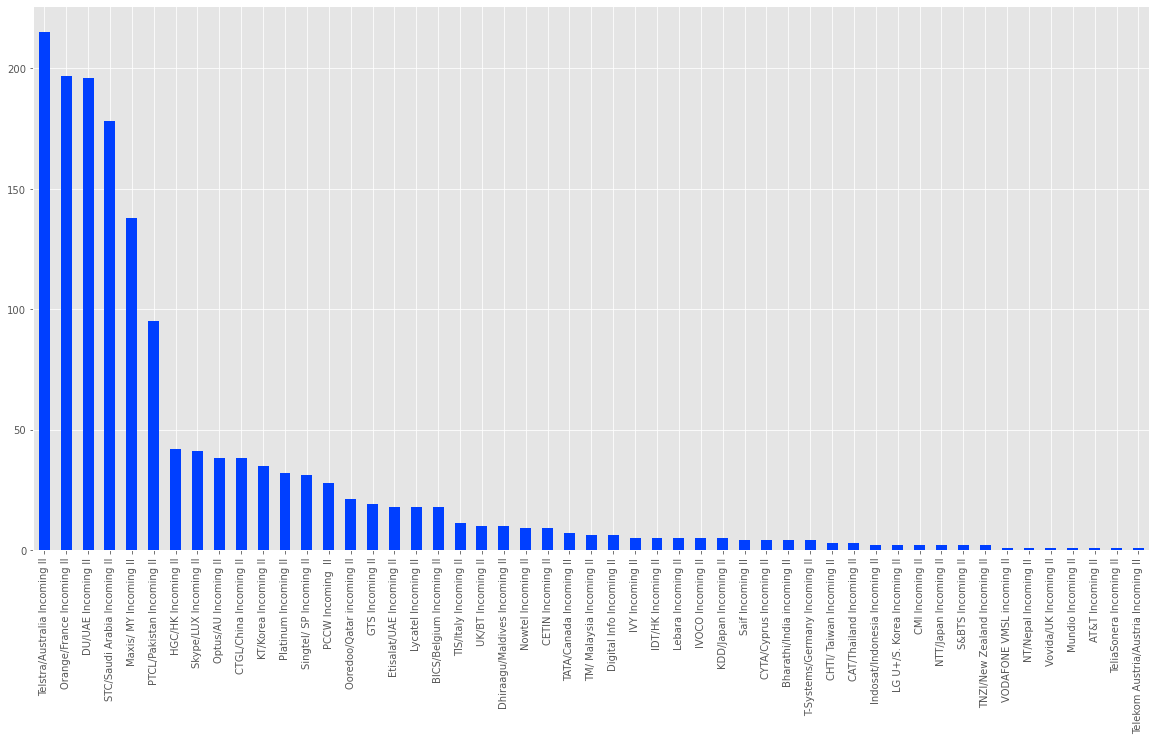

In [42]:
cluster_2_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Outgoing Countries

In [43]:
cluster_2_idd_out_country_df = cluster_2[["event_source.hash","IDD_outgoing_country"]]

In [44]:
cluster_2_idd_out_country_df["IDD_outgoing_country"] = cluster_2_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-44-c45a5d96e560>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
cluster_2_idd_out_country_df = cluster_2_idd_out_country_df.explode("IDD_outgoing_country")

In [46]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [47]:
cluster_2_idd_out_country_df["IDD_outgoing_country"] = cluster_2_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

<AxesSubplot:>

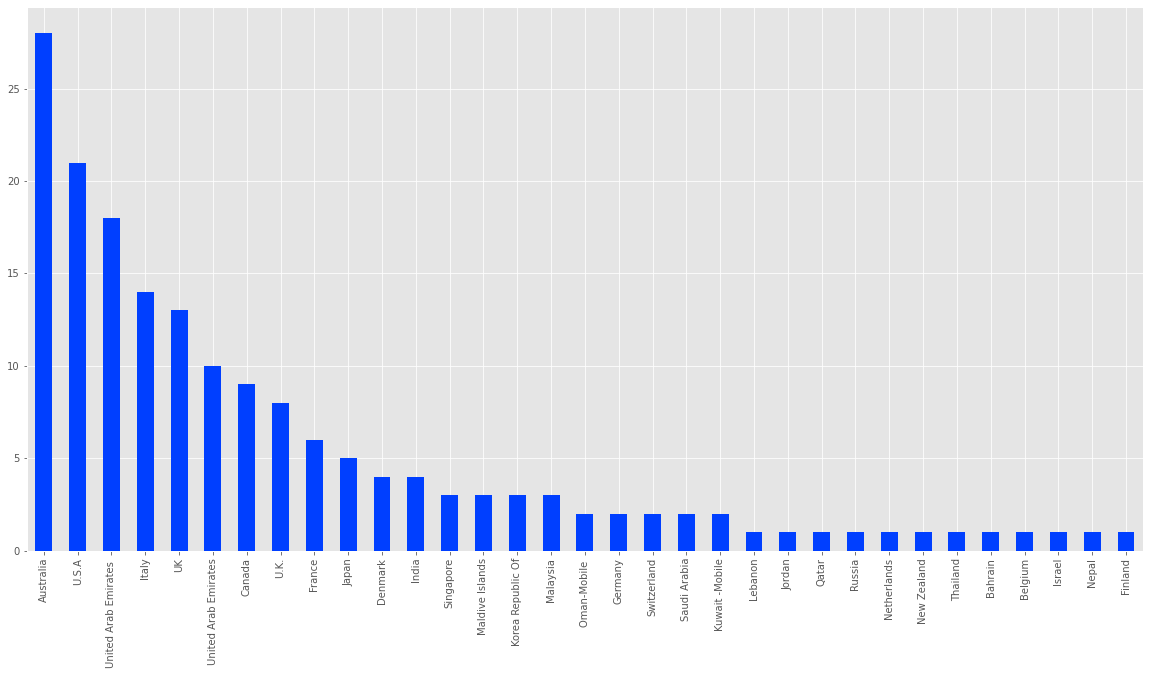

In [48]:
cluster_2_idd_out_country_df["IDD_outgoing_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Rental anlysis

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [49]:
cluster_2["PEO_TV_Categorical"].value_counts()

HIGH       536
MEDIUM     213
LOW         78
NO          42
NO_INFO      6
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 2

<AxesSubplot:ylabel='PEO_TV_Categorical'>

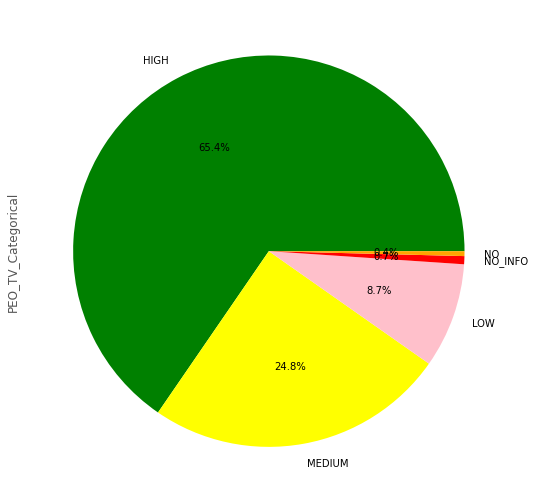

In [51]:
cluster_2_peo = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY")]
cluster_2_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['green','yellow','pink','red','orange'])

In [52]:
ax =cluster_2_peo[(cluster_2_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### PeoTV Usage among Double Play PV users in Cluster 2

<AxesSubplot:ylabel='PEO_TV_Categorical'>

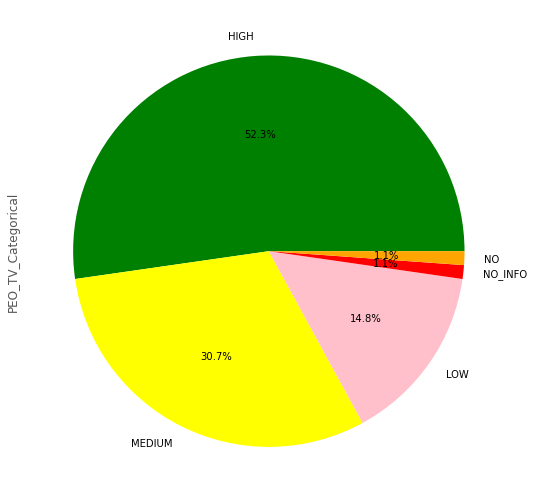

In [54]:
cluster_2_peo_pv = cluster_2[(cluster_2["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_2_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['green','yellow','pink','red','orange'])

In [55]:
cluster_2_peo_pv["PEO_TV_Categorical"].value_counts()

HIGH       46
MEDIUM     27
LOW        13
NO_INFO     1
NO          1
Name: PEO_TV_Categorical, dtype: int64

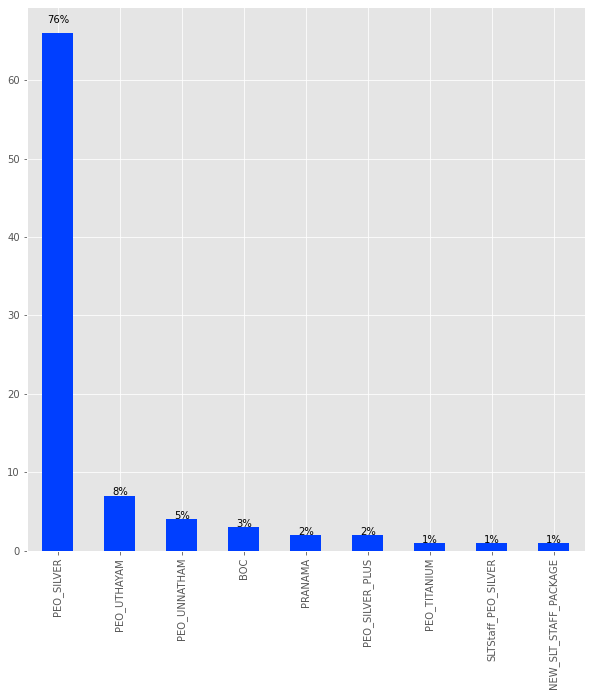

In [56]:
ax =cluster_2_peo_pv[(cluster_2_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [57]:
count_dict = dict(cluster_2["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

In [58]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [59]:
cluster_2["BB_Categorical"].value_counts()

NO_INFO    353
LOW        254
MEDIUM     185
HIGH        83
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 2

In [60]:
cluster_2_bb = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY")]
cluster_2_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

<AxesSubplot:ylabel='BB_Categorical'>

#### BB Usage for Double Play BV Customers in Cluster 2

<AxesSubplot:ylabel='BB_Categorical'>

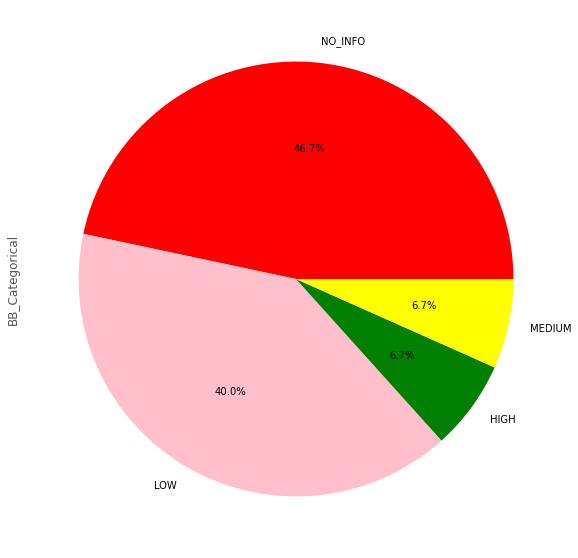

In [61]:
cluster_2_bb_dp = cluster_2[(cluster_2["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_2_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [62]:
count_dict = dict(cluster_2["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

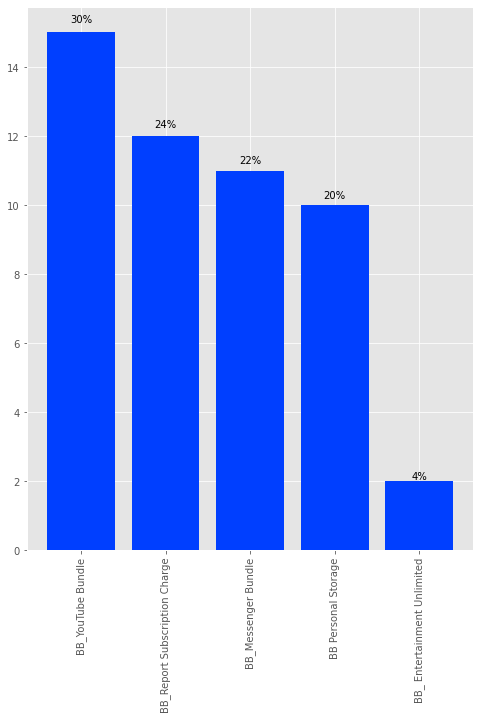

In [63]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [66]:
extra_gb_freq_users = cluster_2[(cluster_2["BB_Extra_GB_Purchased_Scaled"]>0.5)]

In [67]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

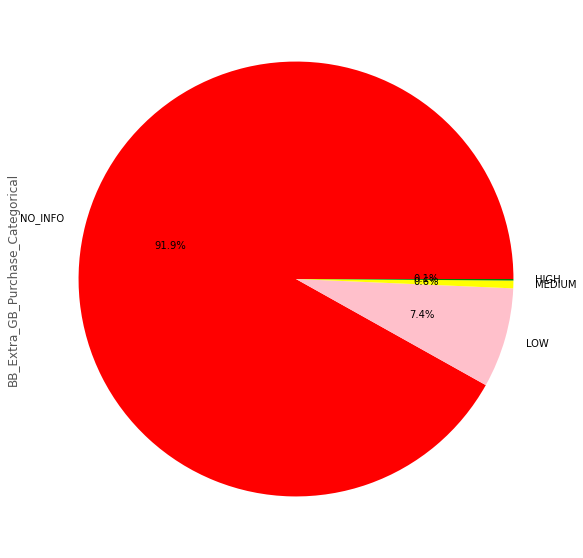

In [68]:
cluster_2["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

In [70]:
plt.figure(figsize=(6,6))
extra_gb_bar_plot = sns.barplot(data=extra_gb_freq_users,x='event_source.hash', y='BB_Extra_GB_Purchased_Scaled')

extra_gb_bar_plot.set_xticklabels(extra_gb_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

[Text(0, 0, '02ab436dc7b5a63579a44641db682ab1'),
 Text(1, 0, '18191da190fc76c860e699d6cc810cf6')]

#### Most Extra GB Useed users - By spent amount with Time

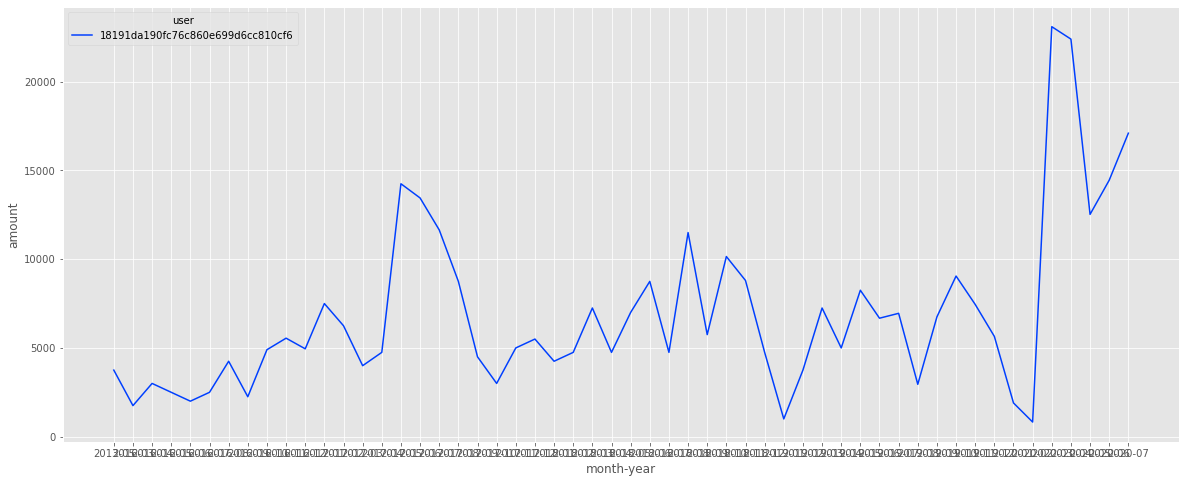

In [71]:

for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year', inplace=True)
        plt.figure(figsize=(20,8))
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')
        

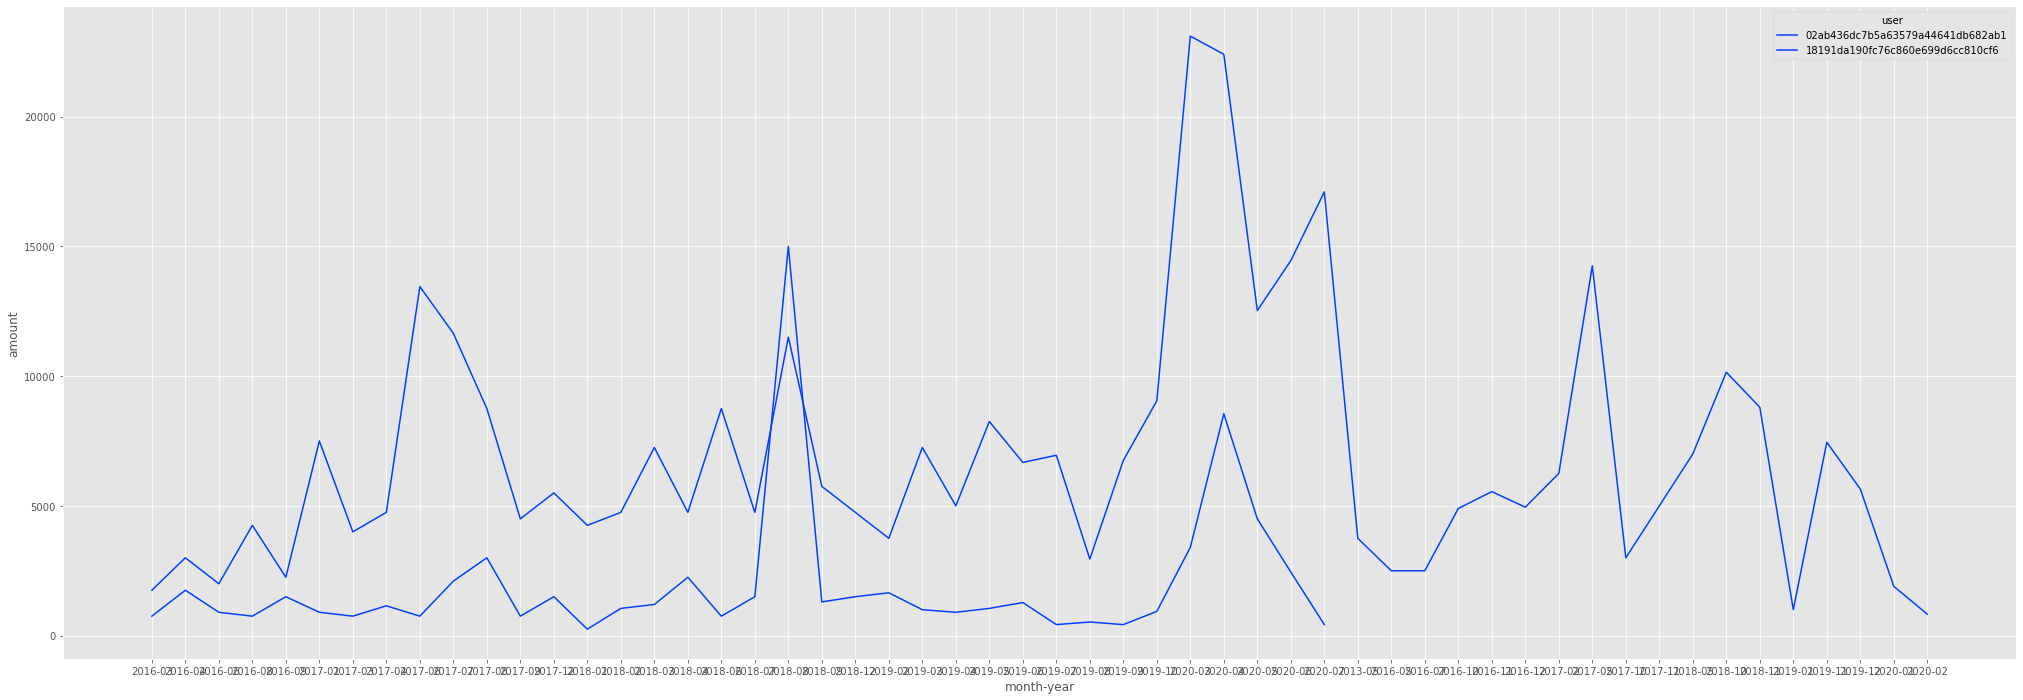

In [72]:
plt.figure(figsize=(35,12))
for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year',inplace=True)
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')

## User Location

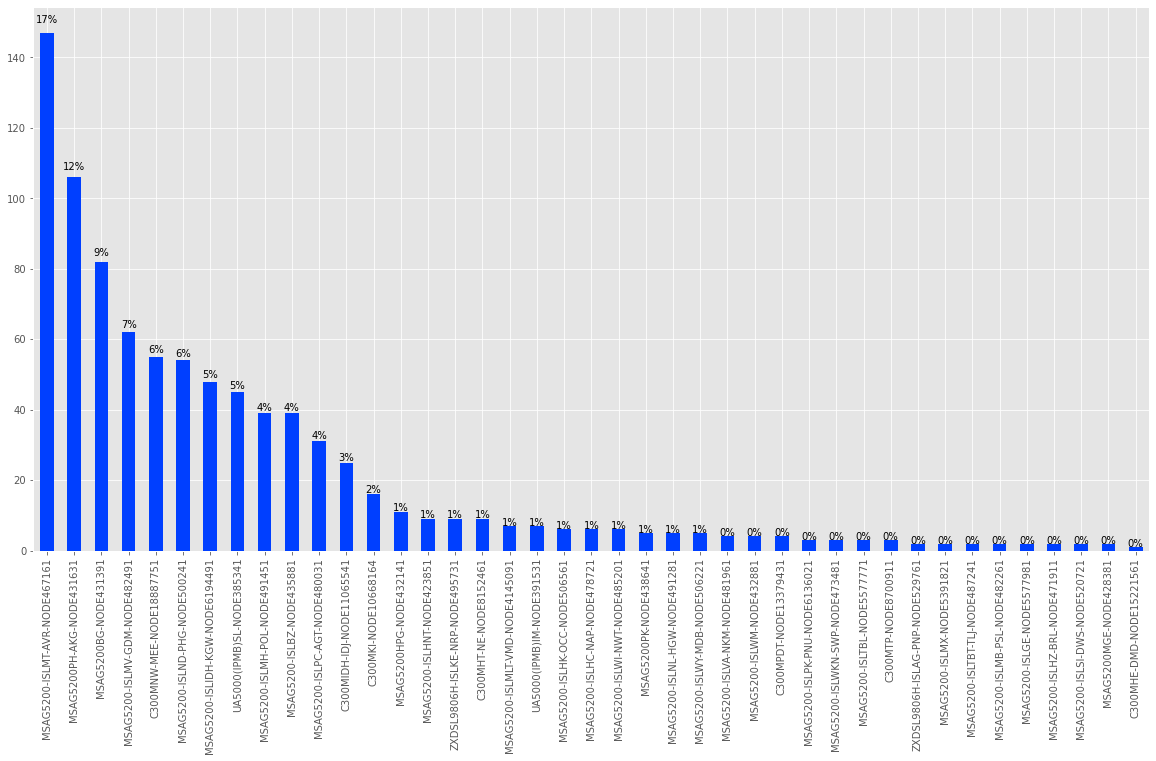

In [73]:
ax =cluster_2["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

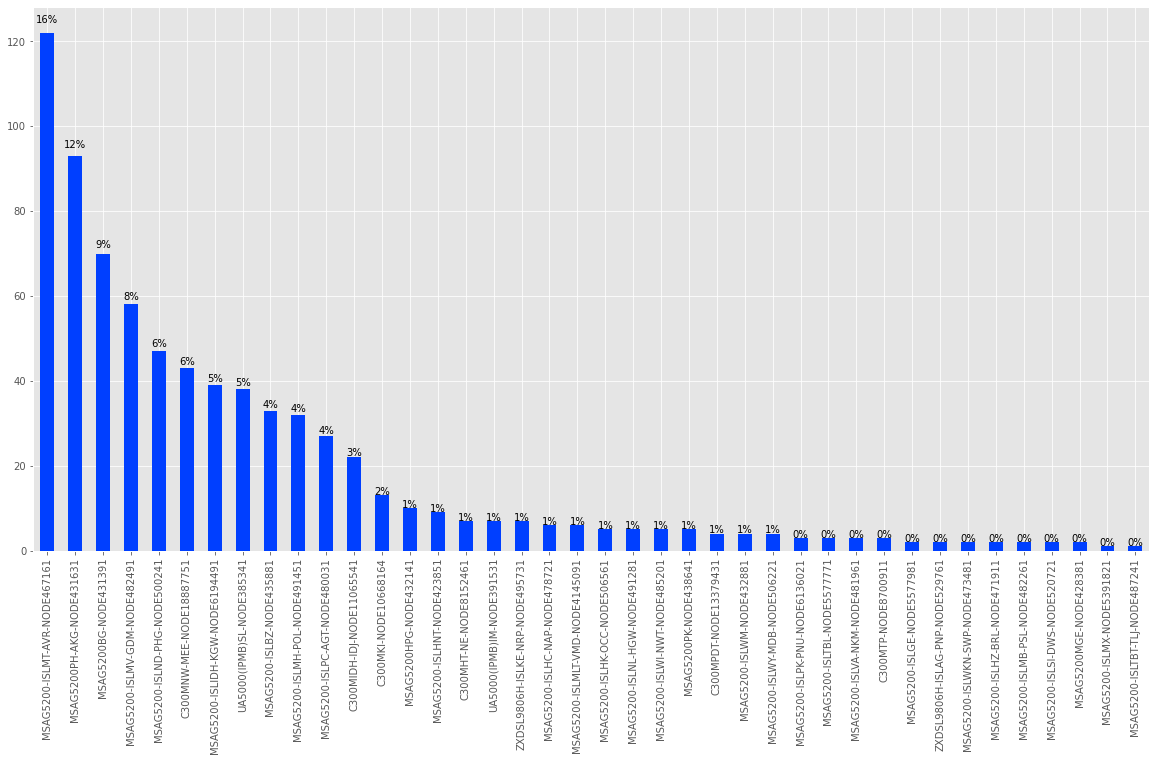

In [74]:
ax =cluster_2_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

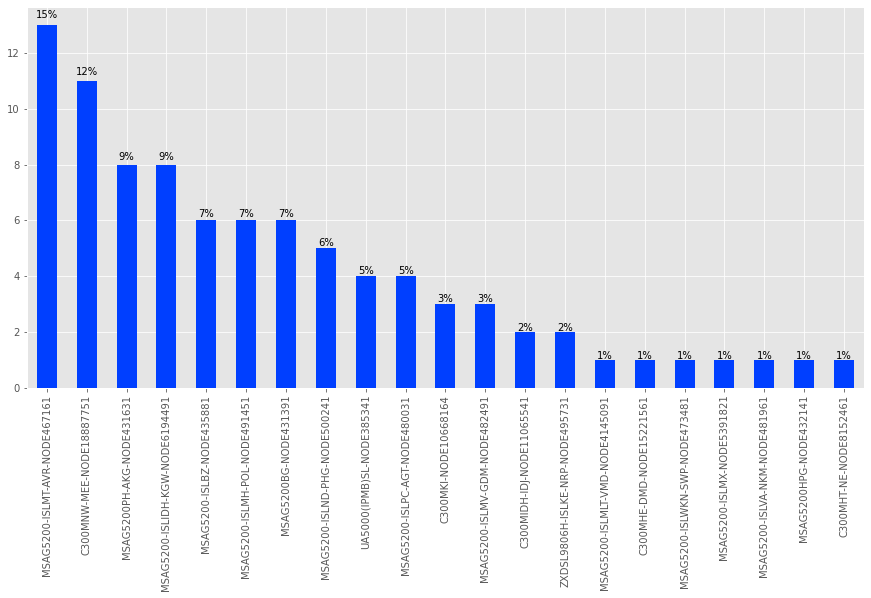

In [75]:
ax =cluster_2_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

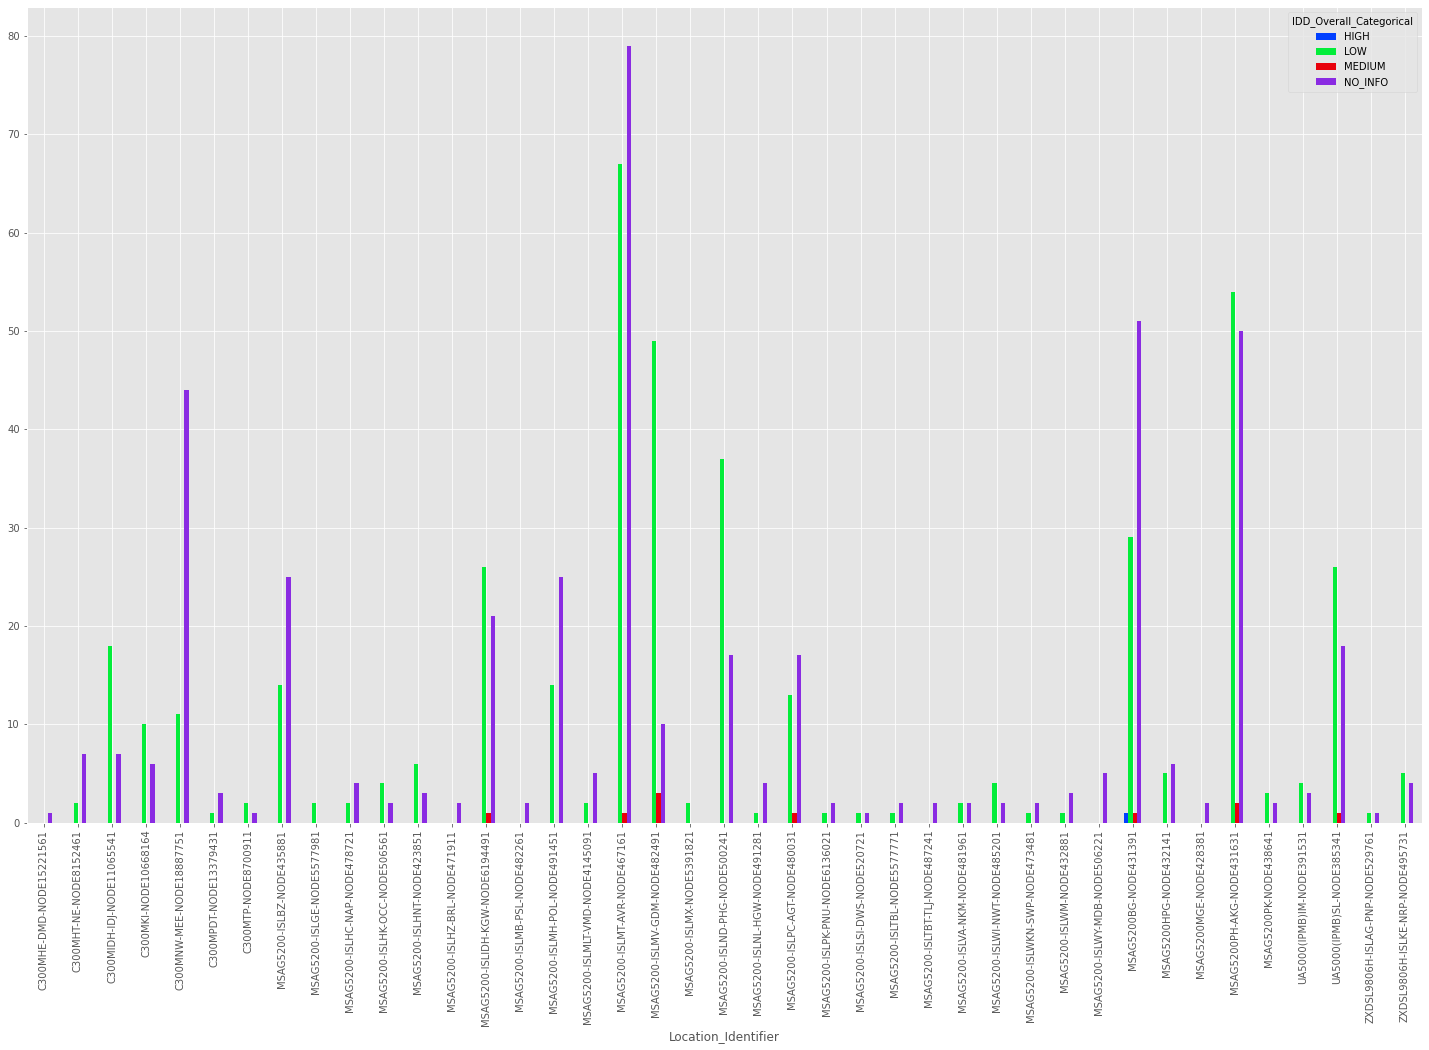

In [76]:
#ax =cluster_2[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_2[(cluster_2["Location_Identifier"] != "NO_INFO")].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

<ipython-input-77-8ef7935e88e7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(1, 0, 'MSAG5200-ISLHK-OCC-NODE506561'),
 Text(2, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(3, 0, 'MSAG5200-ISLHC-NAP-NODE478721'),
 Text(4, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(5, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(6, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(7, 0, 'MSAG5200PK-NODE438641'),
 Text(8, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(9, 0, 'MSAG5200-ISLPK-PNU-NODE6136021'),
 Text(10, 0, 'C300MKI-NODE10668164'),
 Text(11, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(12, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(13, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(14, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(15, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(16, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(17, 0, 'MSAG5200-ISLMX-NODE5391821'),
 Text(18, 0, 'MSAG5200-ISLGE-NODE5577981'),
 Text(19, 0, 'MSAG5200-ISLPC-AGT-NODE480031'),
 Text(20, 0, 'MSAG5200HPG-NODE432141'),
 Text(21, 0, 'MSAG5200MGE-NODE428381'),
 Text(22, 0, '

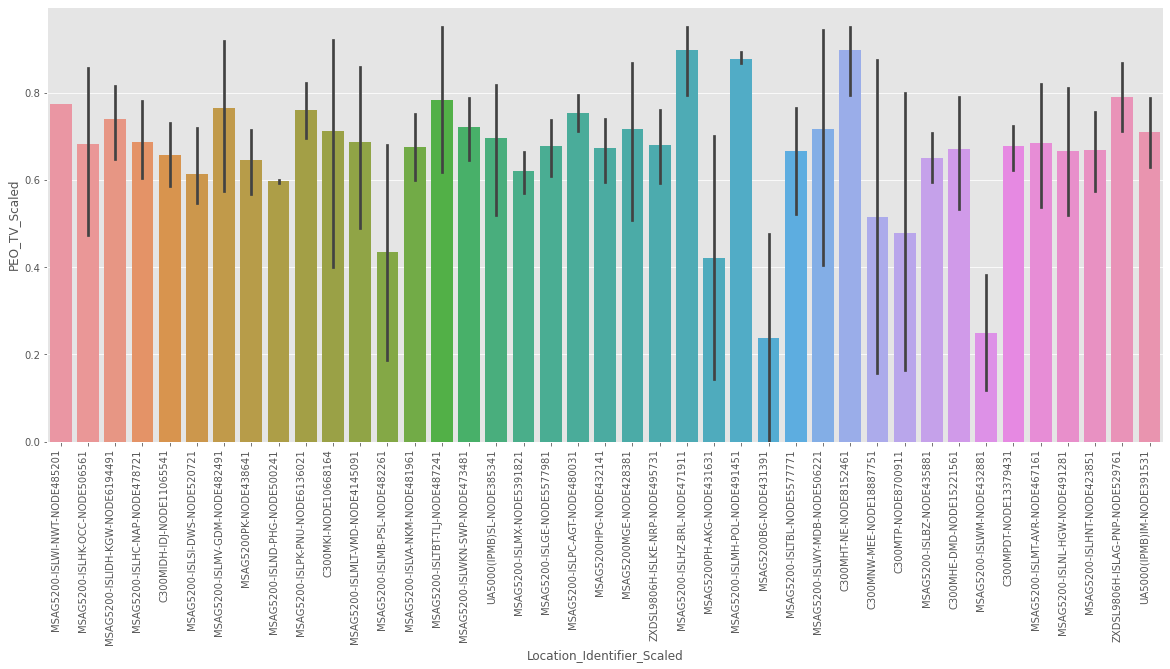

In [77]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_2[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [78]:
location_arr = cluster_2["Location_Identifier"].unique()

<ipython-input-79-4090007e361e>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



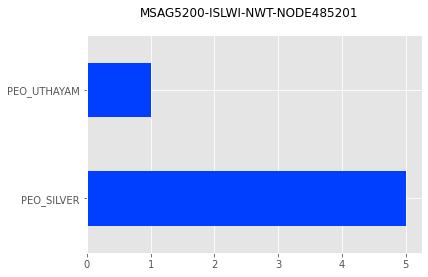

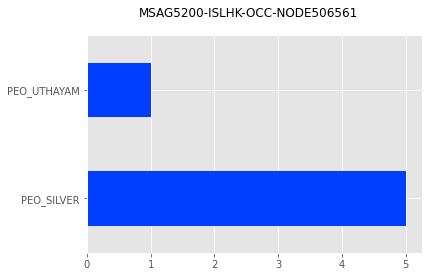

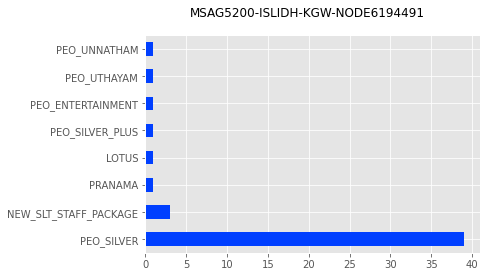

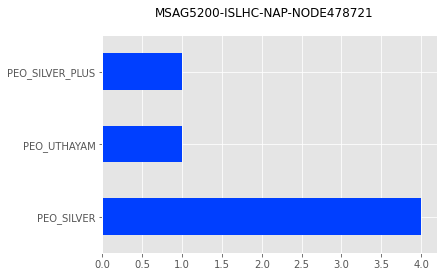

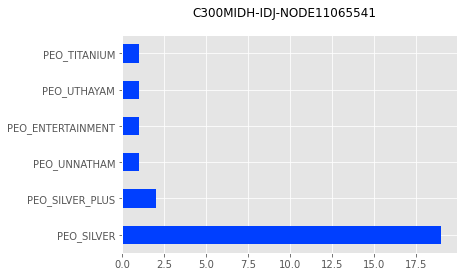

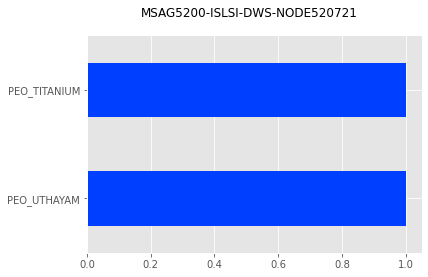

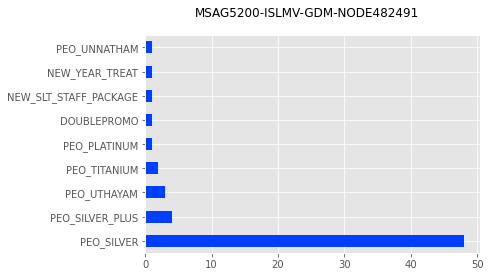

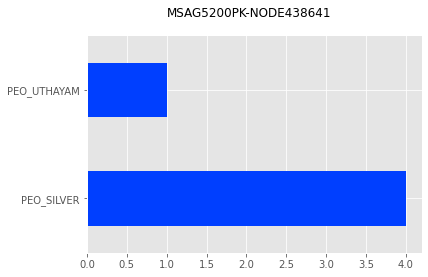

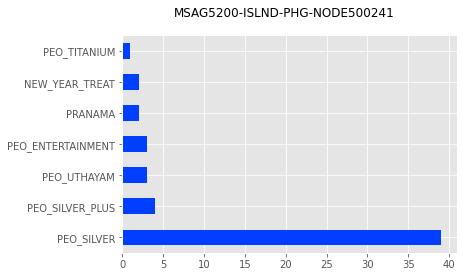

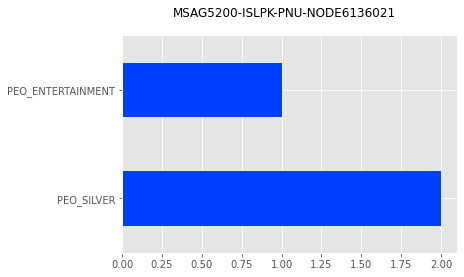

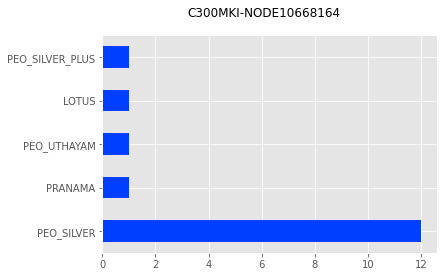

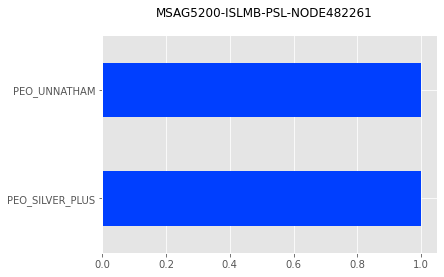

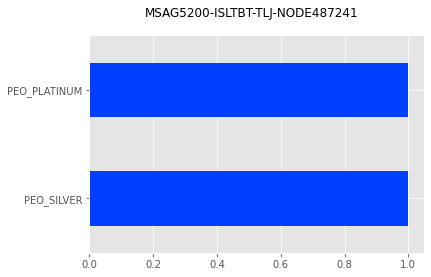

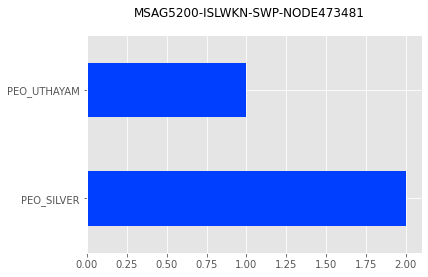

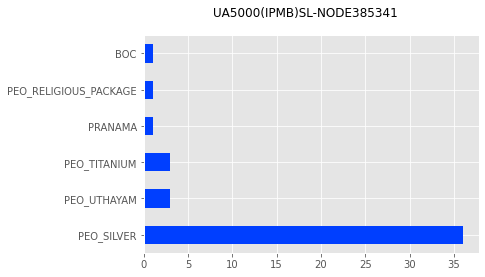

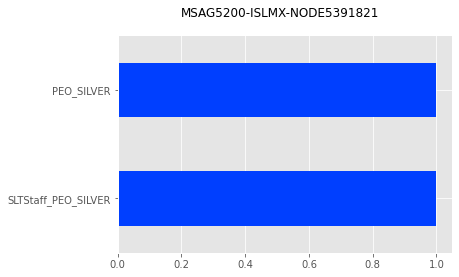

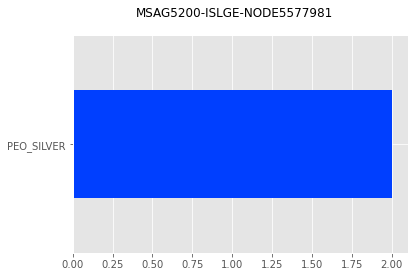

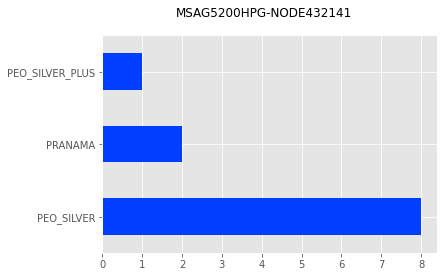

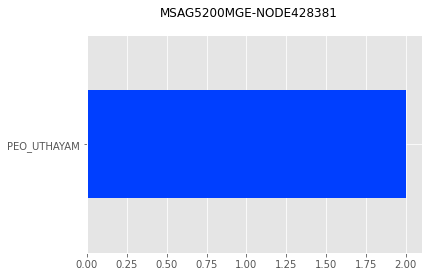

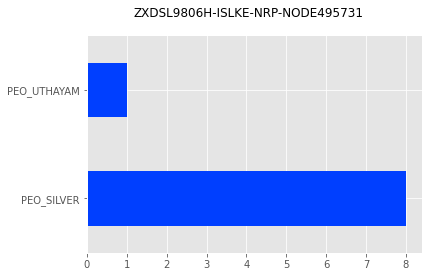

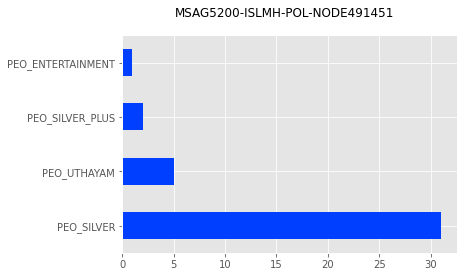

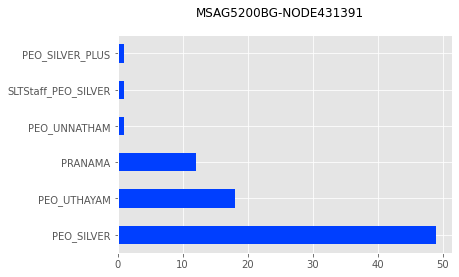

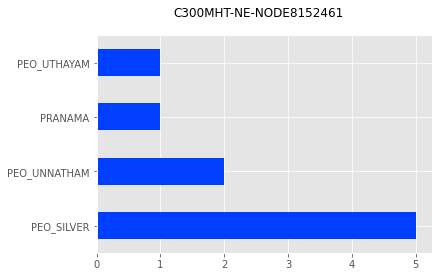

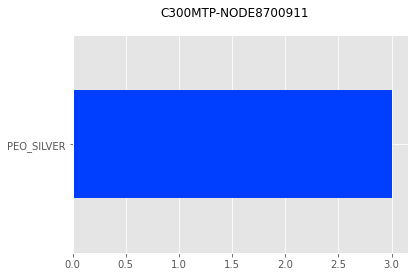

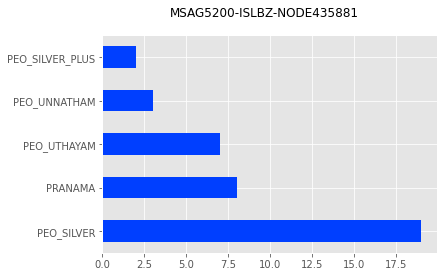

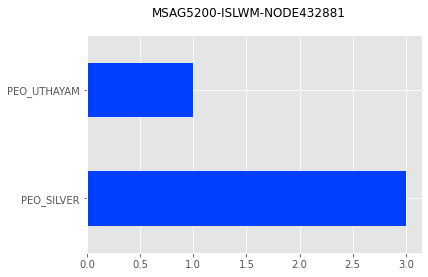

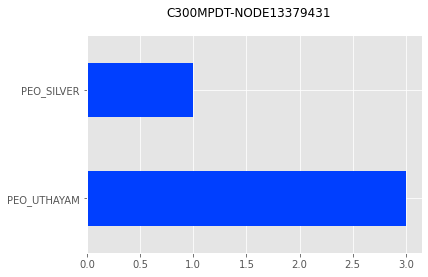

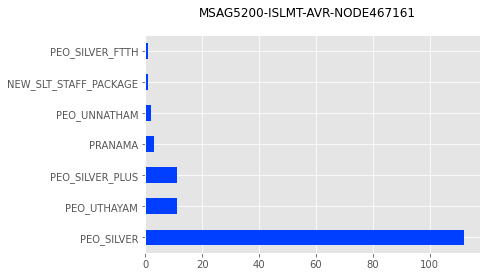

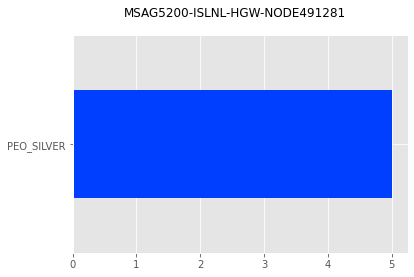

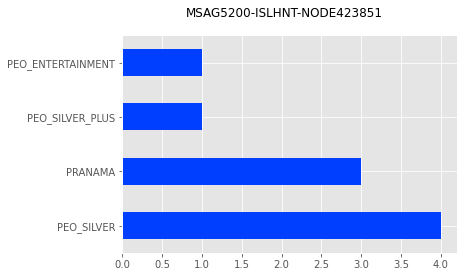

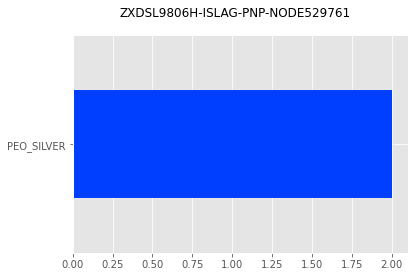

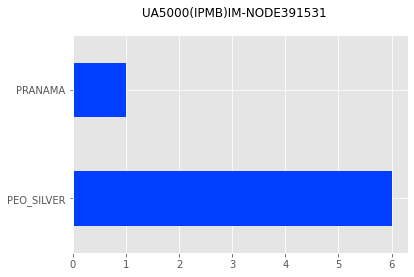

In [79]:
for loc in location_arr:
    user_loc_df = cluster_2[((cluster_2["Location_Identifier"]==loc) & (cluster_2["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-80-6e76c9be7542>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



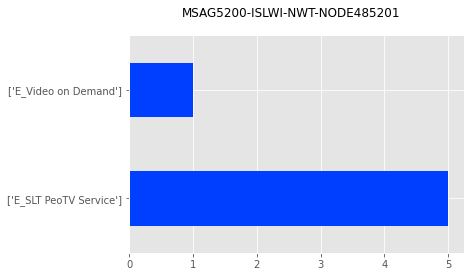

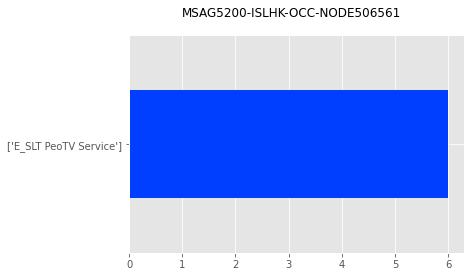

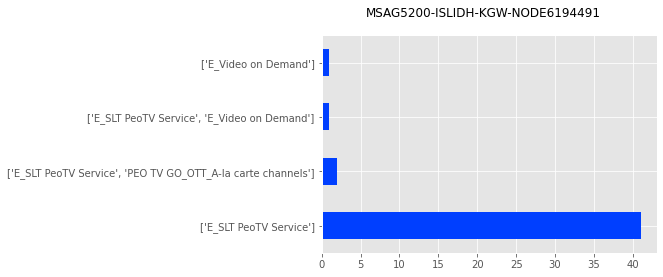

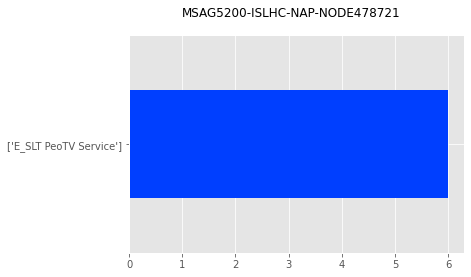

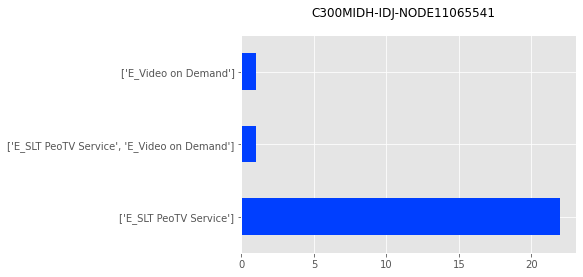

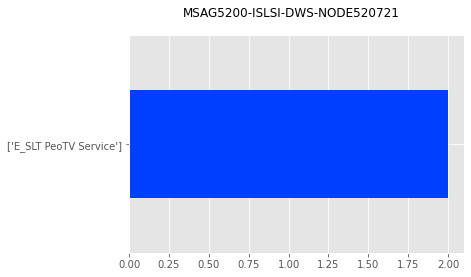

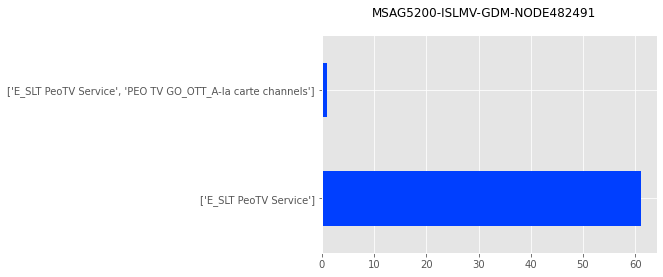

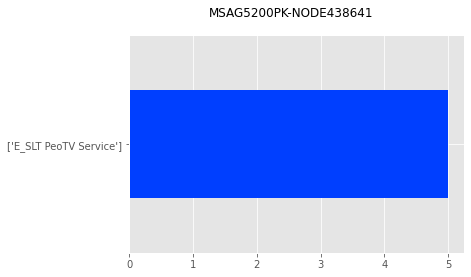

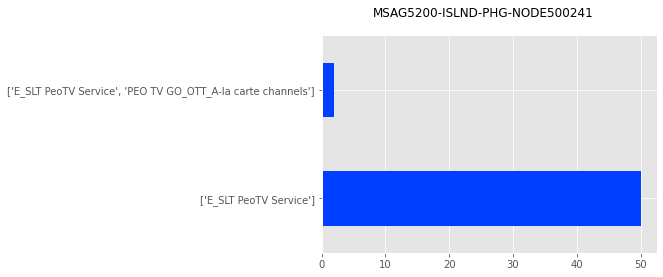

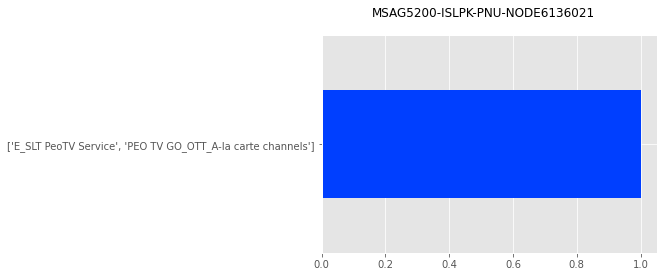

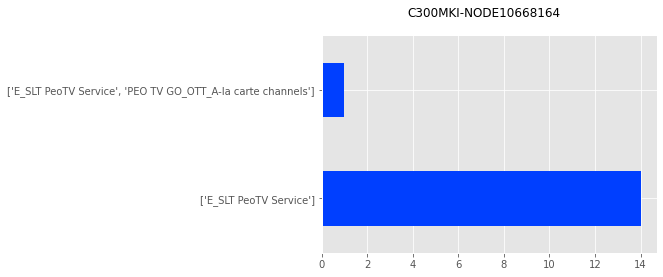

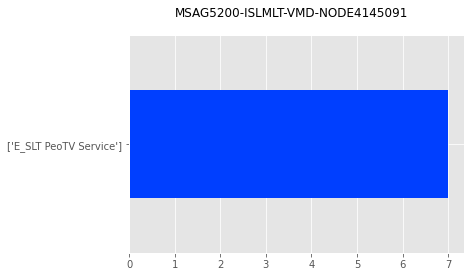

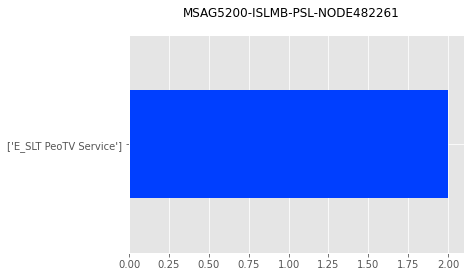

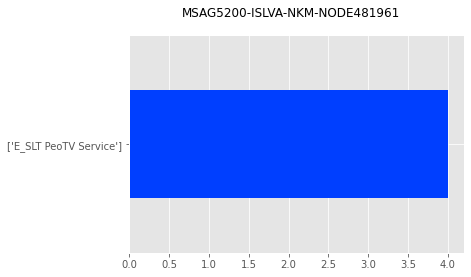

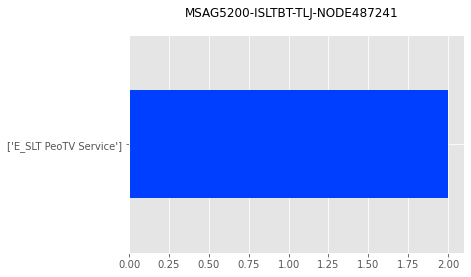

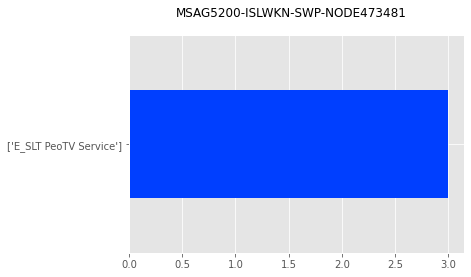

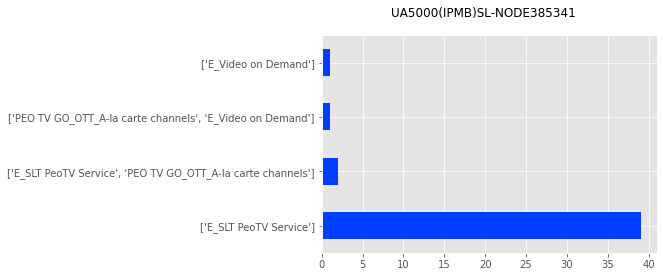

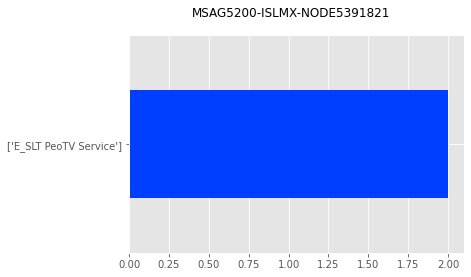

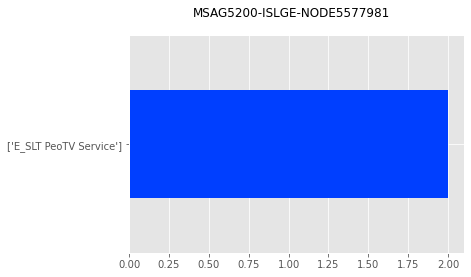

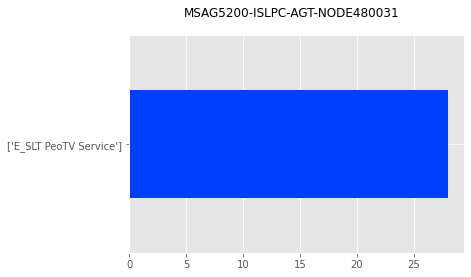

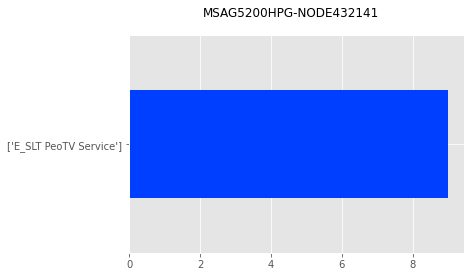

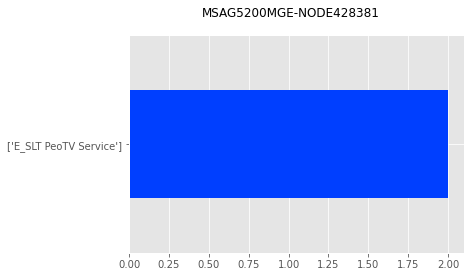

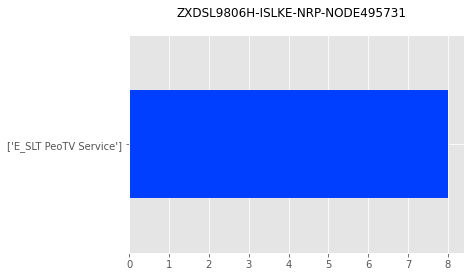

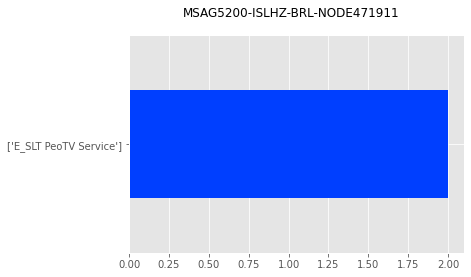

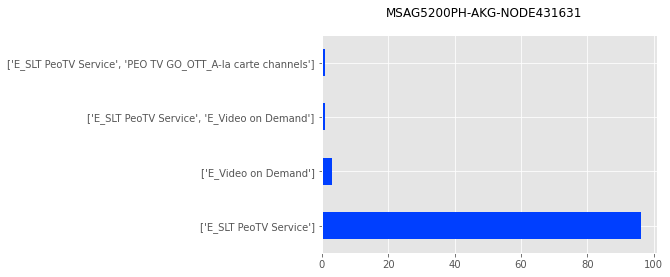

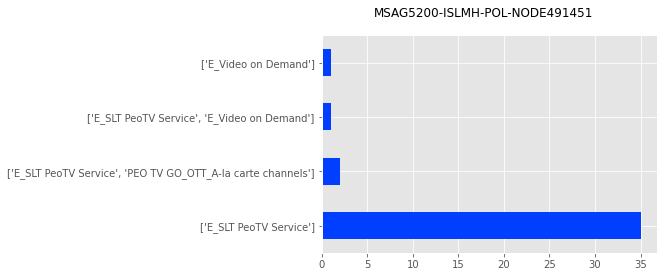

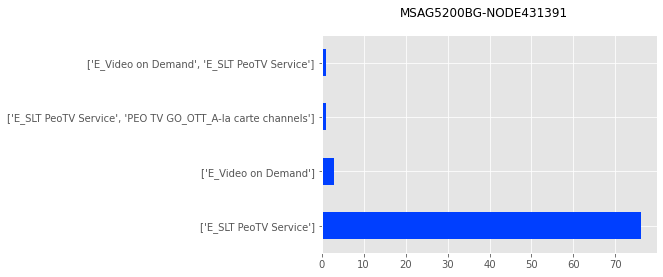

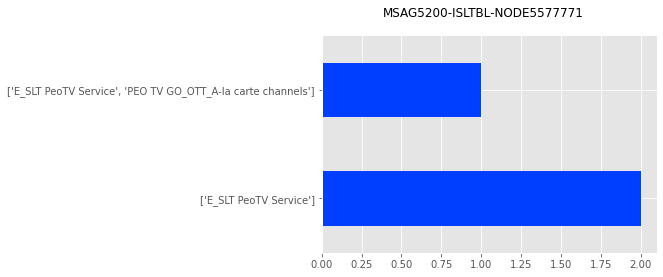

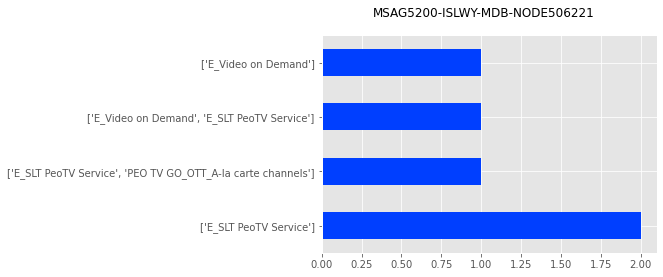

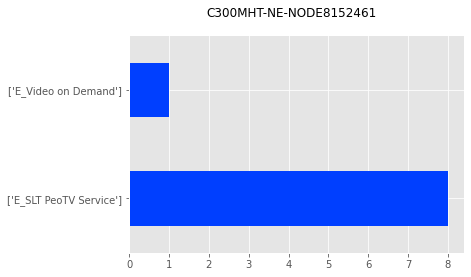

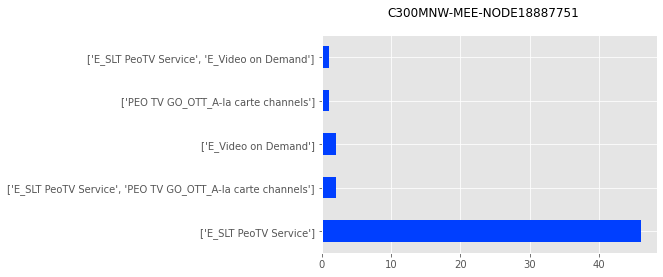

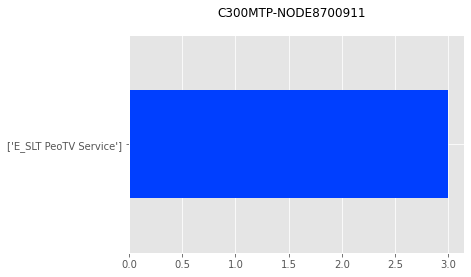

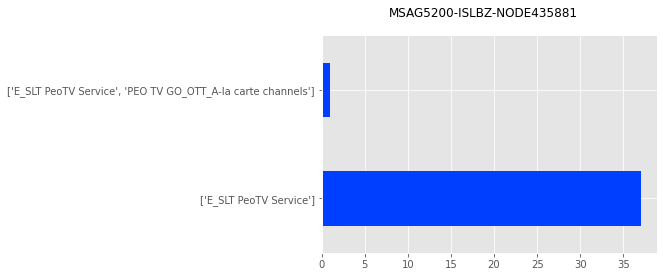

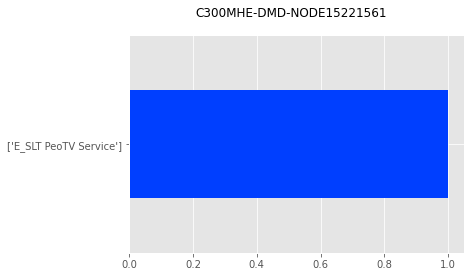

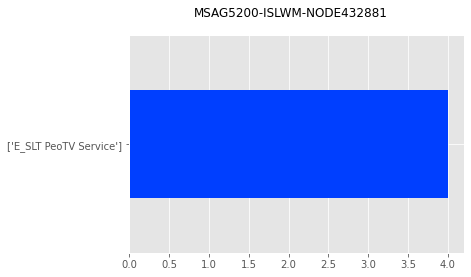

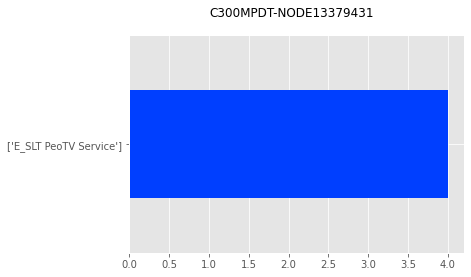

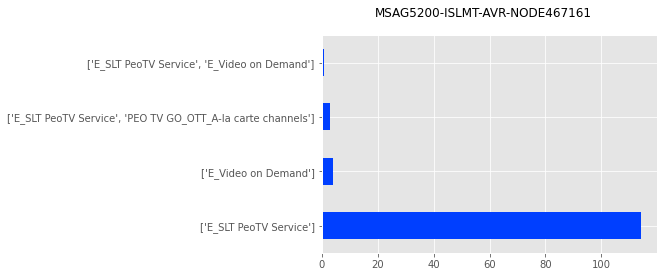

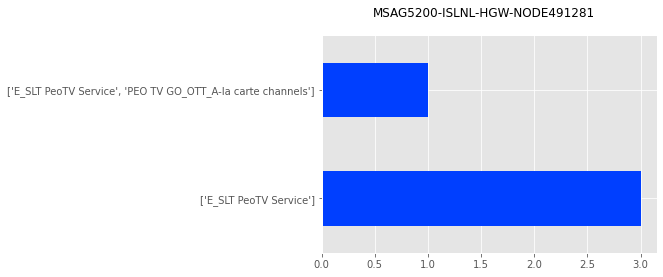

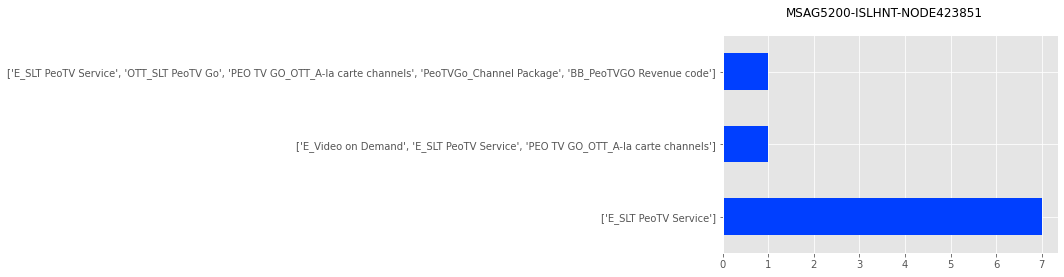

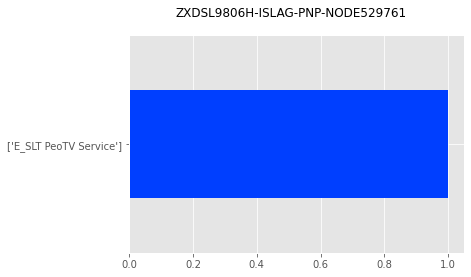

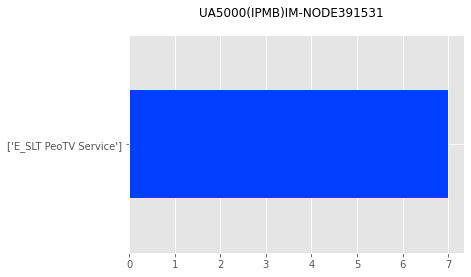

In [80]:
for loc in location_arr:
    user_loc_df = cluster_2[((cluster_2["Location_Identifier"]==loc) & (cluster_2["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-81-80f6c42986c3>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

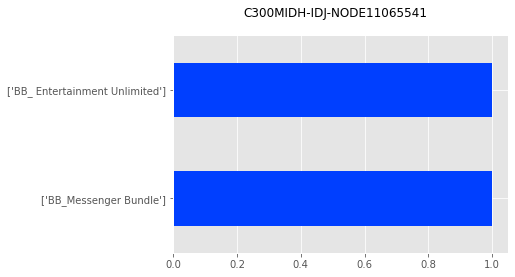

<Figure size 432x288 with 0 Axes>

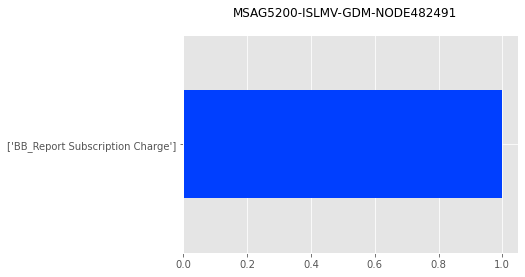

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

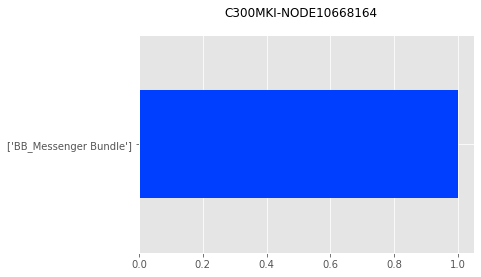

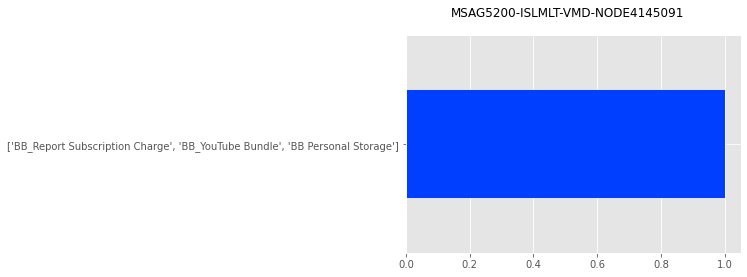

<Figure size 432x288 with 0 Axes>

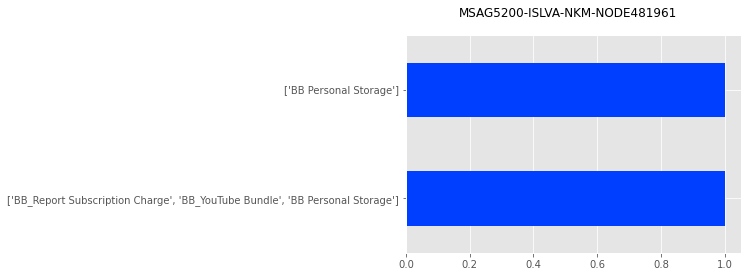

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

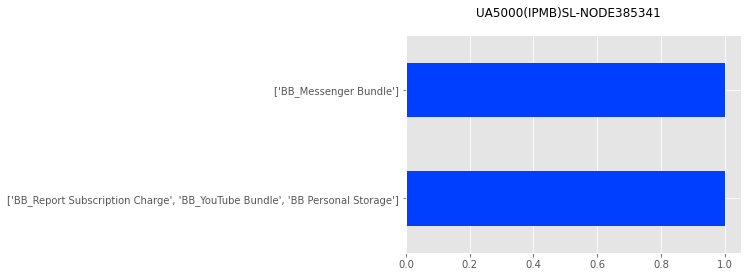

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

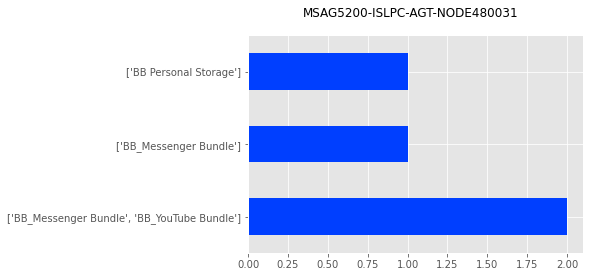

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

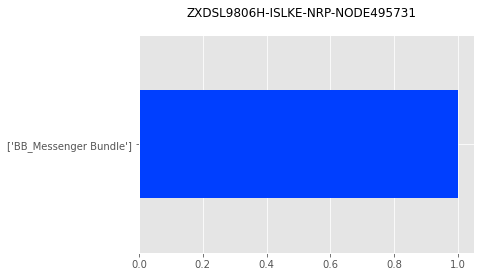

<Figure size 432x288 with 0 Axes>

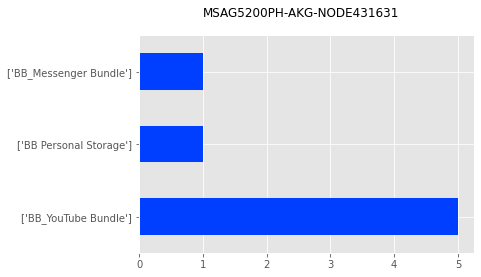

<Figure size 432x288 with 0 Axes>

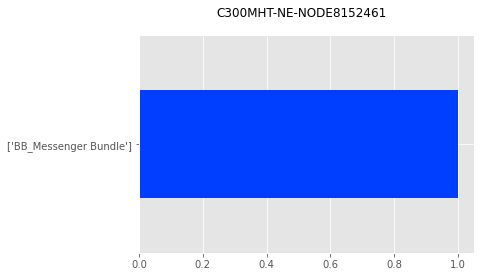

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

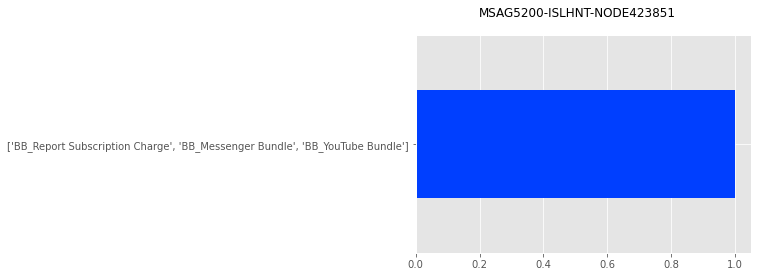

<Figure size 432x288 with 0 Axes>

In [81]:
for loc in location_arr:
    user_loc_df = cluster_2[((cluster_2["Location_Identifier"]==loc) & (cluster_2["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

In [83]:
cluster_2["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['green','yellow','red'])

<AxesSubplot:ylabel='GENDER'>

<AxesSubplot:ylabel='GENDER'>

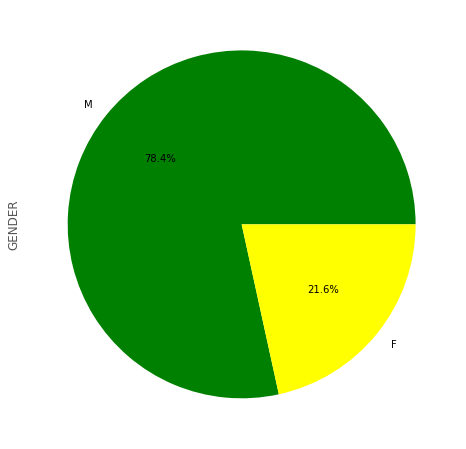

In [142]:
cluster_2[(cluster_2["GENDER"]!= "NO_INFO")]["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['green','yellow'])

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

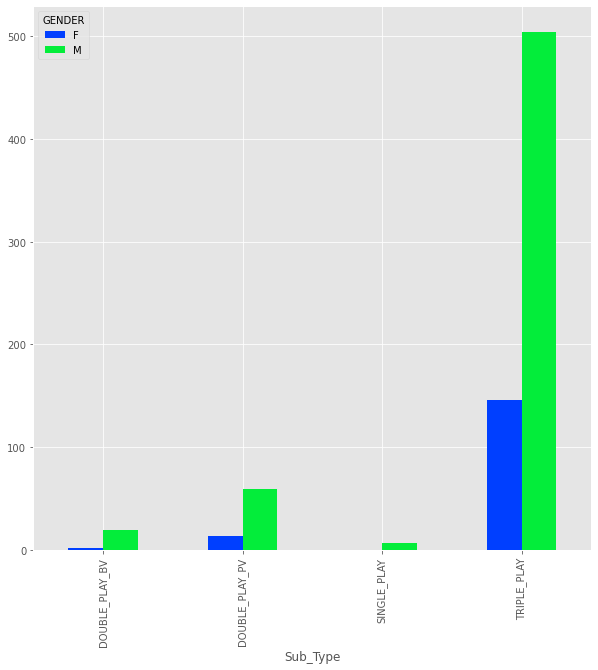

In [84]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

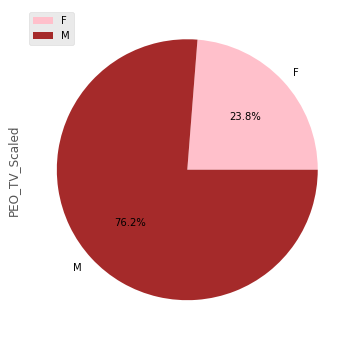

In [85]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

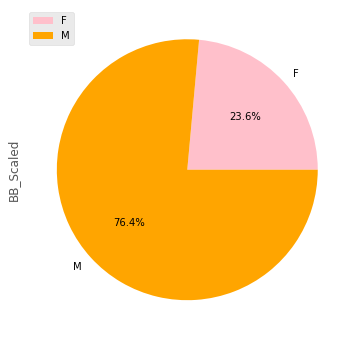

In [86]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

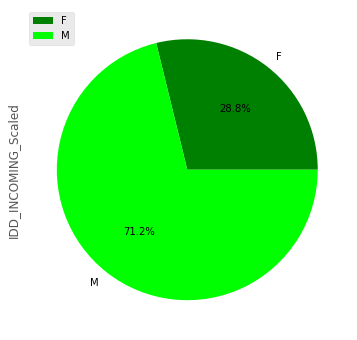

In [87]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("green","lime"), subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

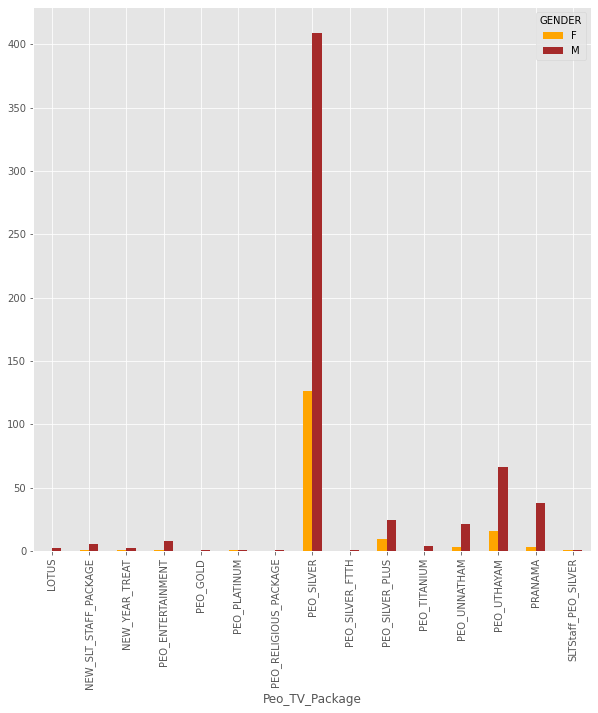

In [88]:
 cluster_2[((cluster_2["GENDER"] != "NO_INFO") &(cluster_2["Peo_TV_Package"] != "NO_INFO"))].groupby(["Peo_TV_Package", "GENDER"]).size().unstack().plot.bar(figsize=(10,10),color=("orange", "brown"))

## AGE Analysis

In [89]:
cluster_2["AGE"].describe()

count    751.000000
mean      55.643142
std       14.991658
min       21.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      121.000000
Name: AGE, dtype: float64

In [90]:
bins = [0, 30,55,65,85,110]
cluster_2['AGE_Groups'] = pd.cut(cluster_2['AGE'], bins)

<ipython-input-90-b41f0025cf00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

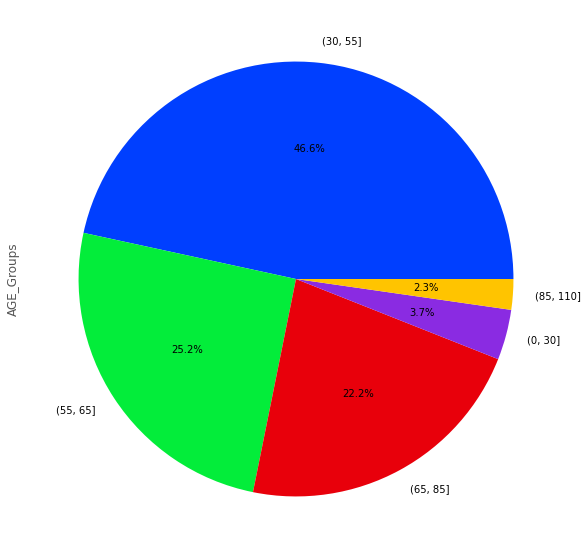

In [91]:
cluster_2["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

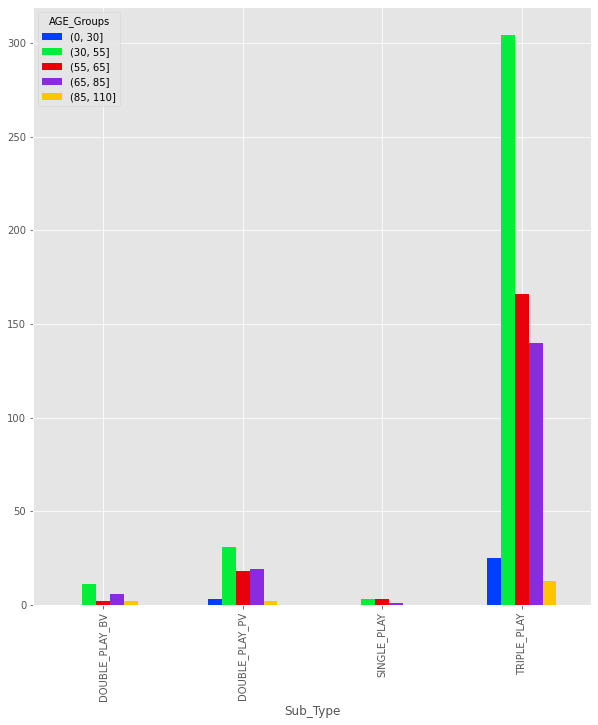

In [92]:
cluster_2.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

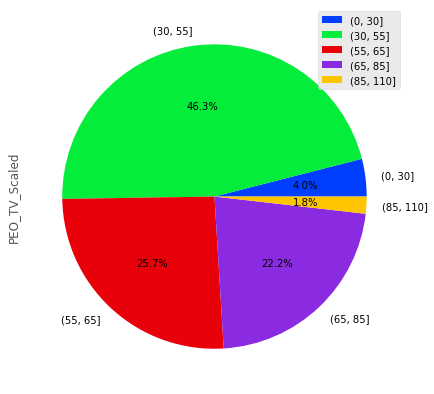

In [93]:
cluster_2[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

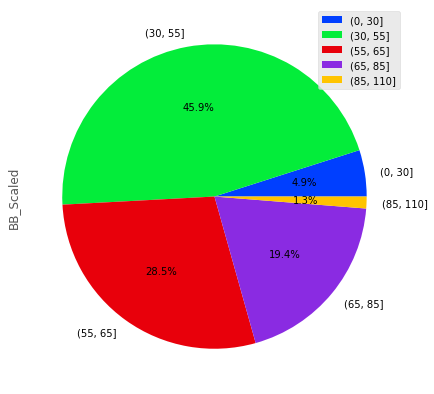

In [94]:
cluster_2[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

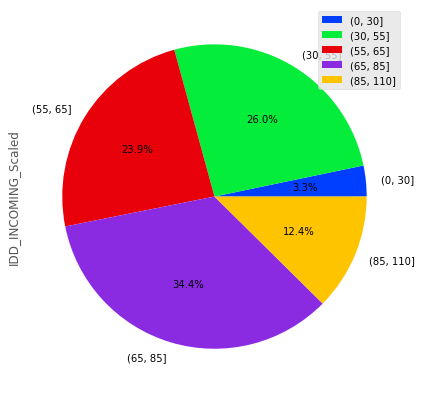

In [95]:
cluster_2[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

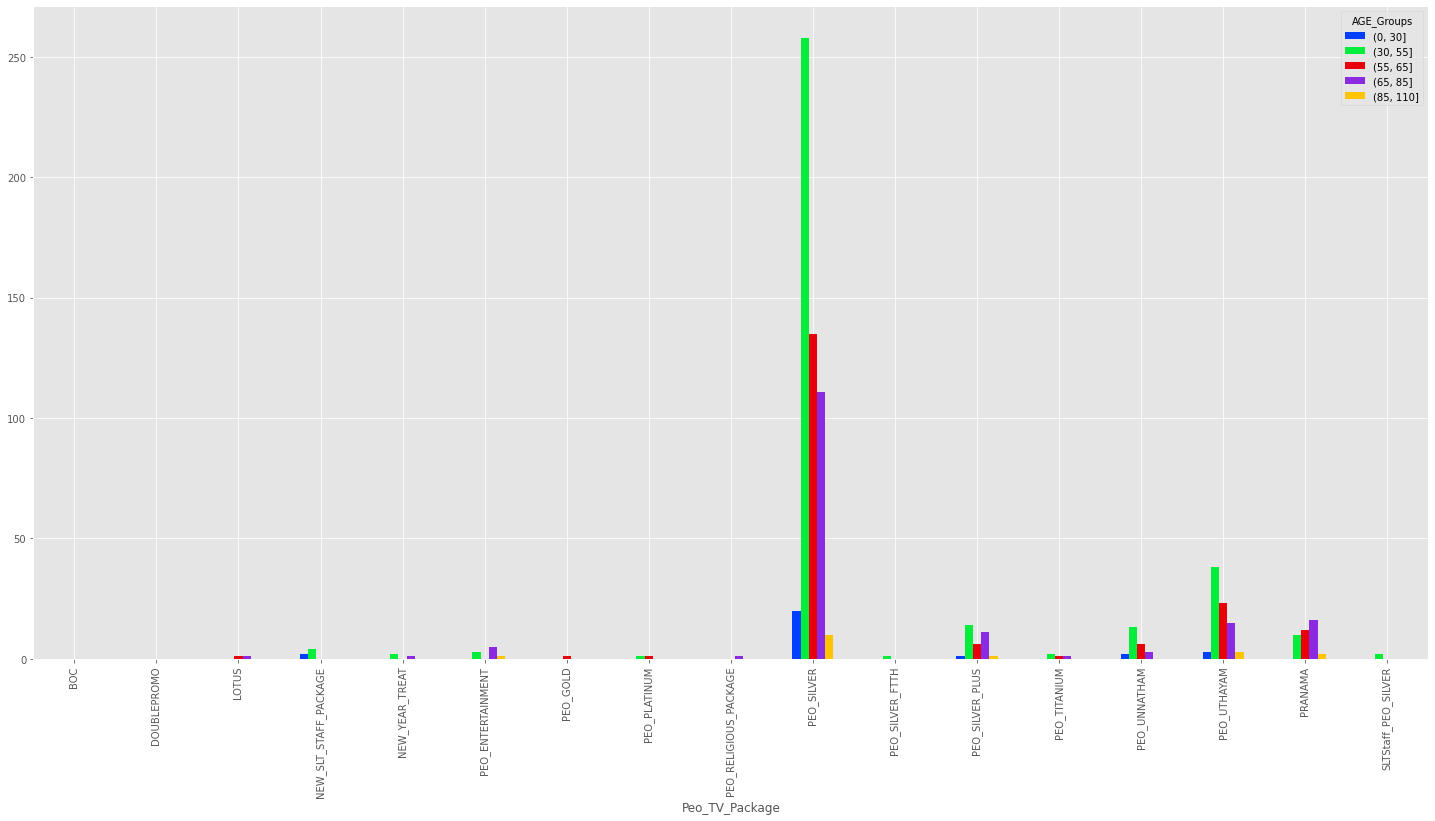

In [96]:
cluster_2[(cluster_2["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(25,12))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [97]:
cluster_2["Having_Insurance"].value_counts()

NO_INFO    752
YES        123
Name: Having_Insurance, dtype: int64

In [98]:
cluster_2[(cluster_2["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

In [99]:
cluster_2[(cluster_2["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

In [100]:
cluster_2[(cluster_2["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

<AxesSubplot:xlabel='Having_Insurance'>

#### Having Senior citizens

In [145]:
cluster_2["Having_Senior_Citizen"].value_counts(normalize=True)

NO_INFO    0.835429
YES        0.164571
Name: Having_Senior_Citizen, dtype: float64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

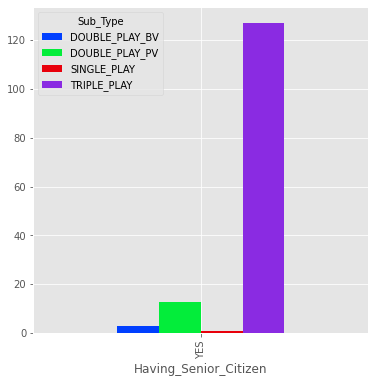

In [102]:
cluster_2[(cluster_2["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

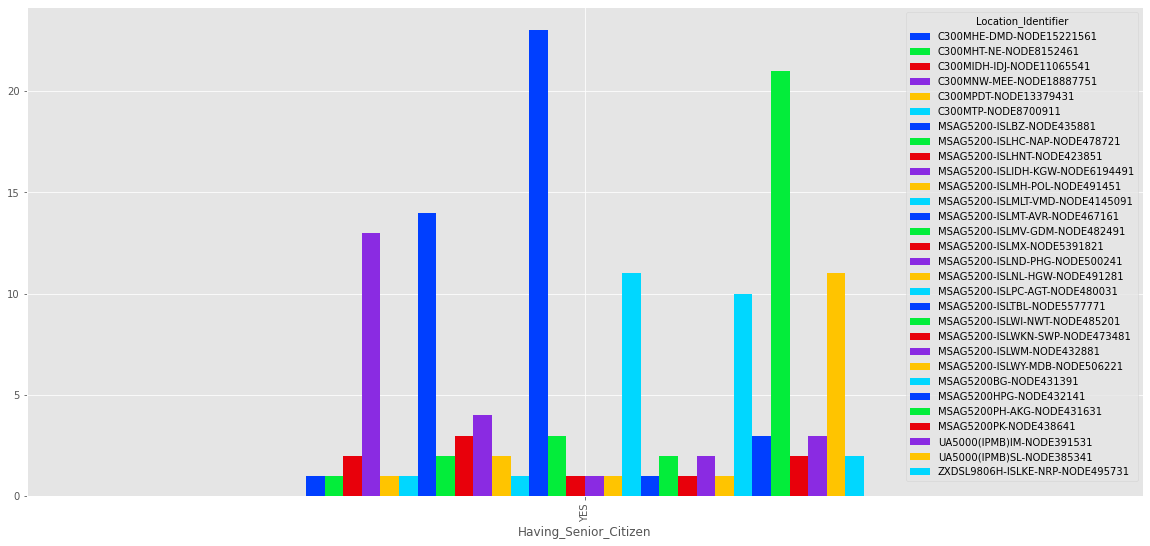

In [103]:
cluster_2[(cluster_2["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [146]:
cluster_2["Having_Family_Member_Abroad"].value_counts(normalize=True)

NO_INFO    0.732571
YES        0.267429
Name: Having_Family_Member_Abroad, dtype: float64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

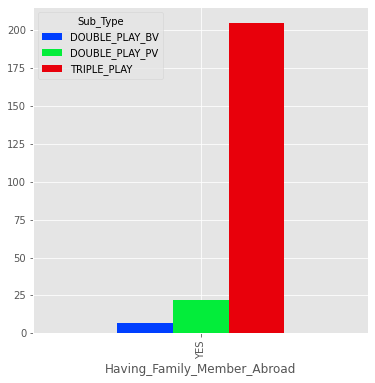

In [105]:
cluster_2[(cluster_2["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

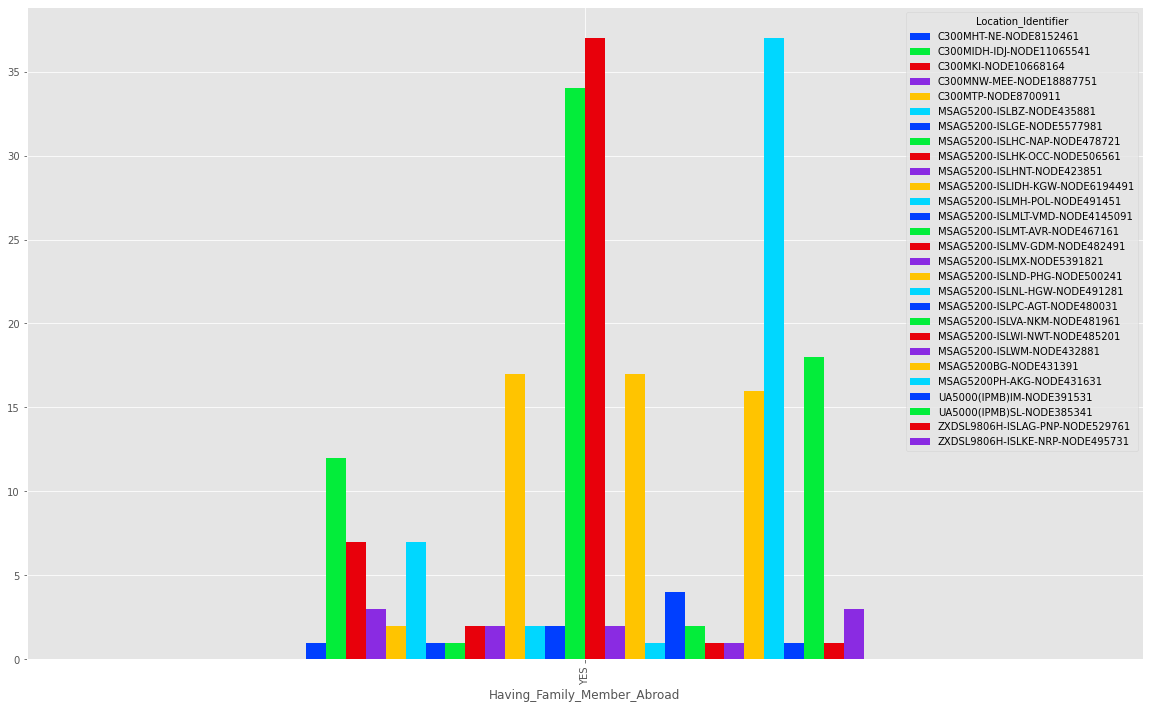

In [106]:
cluster_2[(cluster_2["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [147]:
cluster_2["Having_Working_Professionals"].value_counts(normalize=True)

NO_INFO    0.797714
YES        0.202286
Name: Having_Working_Professionals, dtype: float64

<AxesSubplot:xlabel='Having_Working_Professionals'>

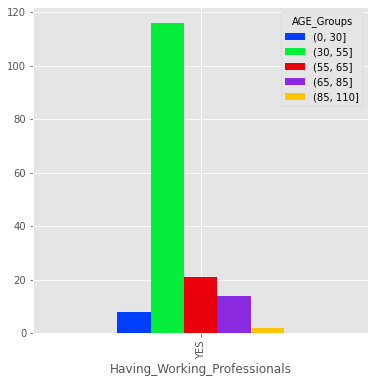

In [108]:
cluster_2[(cluster_2["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

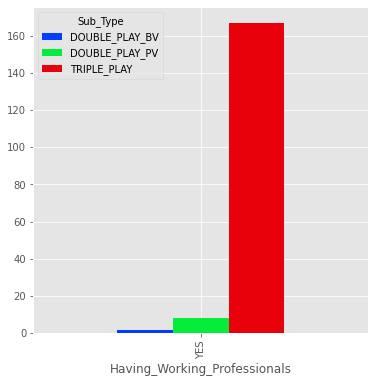

In [109]:
cluster_2[(cluster_2["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

In [110]:
cluster_2[(cluster_2["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

<AxesSubplot:xlabel='Having_Working_Professionals'>

#### Having Teenagers Students

In [148]:
cluster_2["Having_Teenagers_Students"].value_counts(normalize=True)

NO_INFO    0.834286
YES        0.165714
Name: Having_Teenagers_Students, dtype: float64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

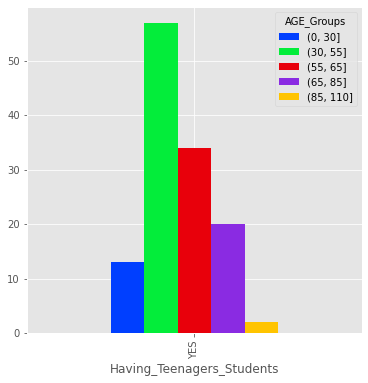

In [112]:
cluster_2[(cluster_2["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

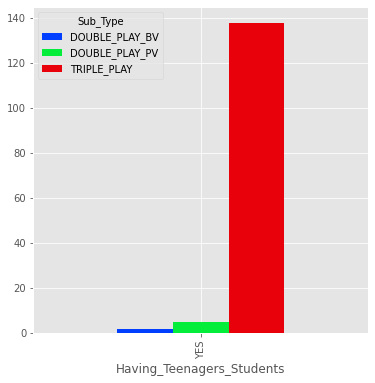

In [113]:
cluster_2[(cluster_2["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

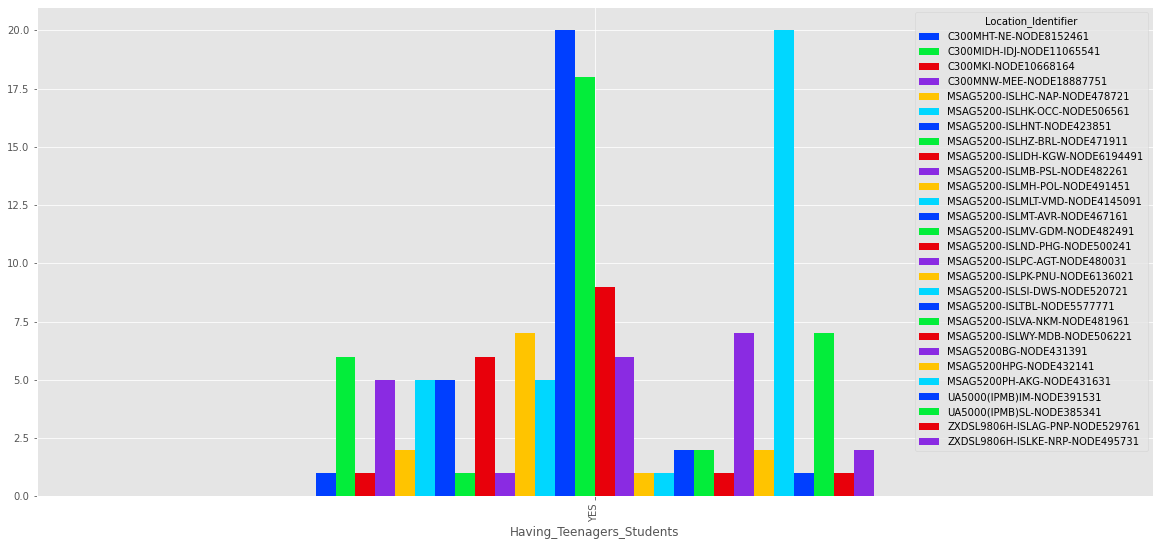

In [114]:
cluster_2[(cluster_2["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a Tamil customer

In [149]:
cluster_2["Tamil_Customer"].value_counts(normalize=True)

NO_INFO    0.861714
YES        0.138286
Name: Tamil_Customer, dtype: float64

<AxesSubplot:xlabel='Tamil_Customer'>

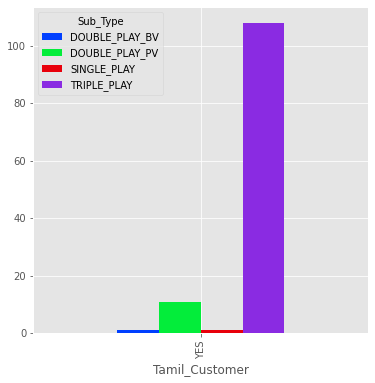

In [116]:
cluster_2[(cluster_2["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Tamil_Customer'>

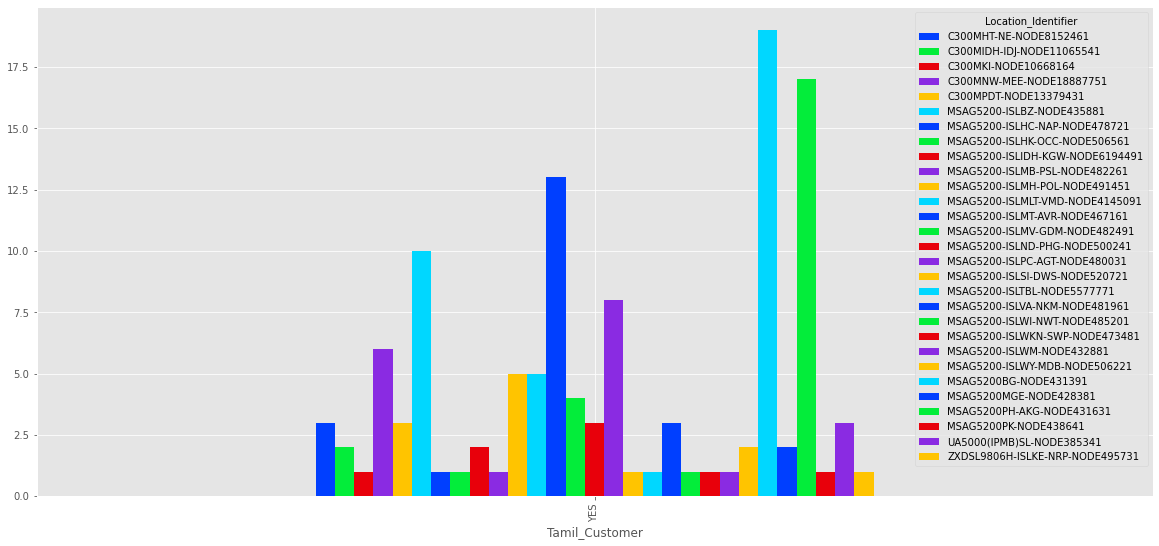

In [117]:
cluster_2[(cluster_2["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Kids at Home

In [150]:
cluster_2["Having_Kids_at_Home"].value_counts(normalize=True)

NO_INFO    0.777143
YES        0.222857
Name: Having_Kids_at_Home, dtype: float64

<AxesSubplot:xlabel='Having_Kids_at_Home'>

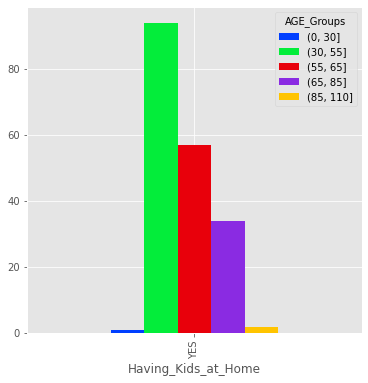

In [119]:
cluster_2[(cluster_2["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

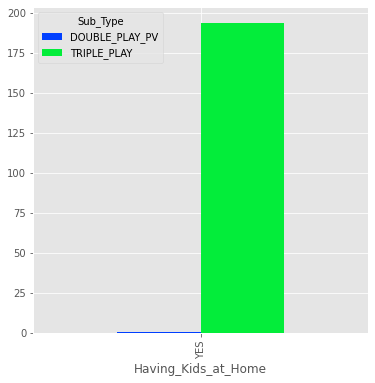

In [120]:
cluster_2[(cluster_2["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

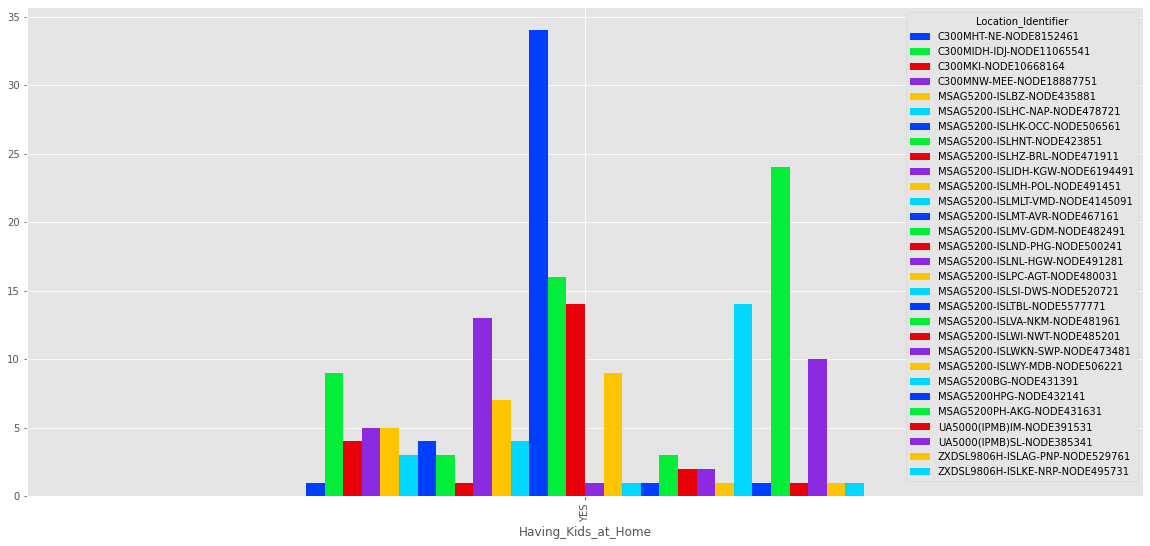

In [121]:
cluster_2[(cluster_2["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

### Identifying factors for recommending Packages for Cluster 2

#### Feasible locations to offer PeoTV

In [122]:
cluster_2_peo_loc = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY") | (cluster_2["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

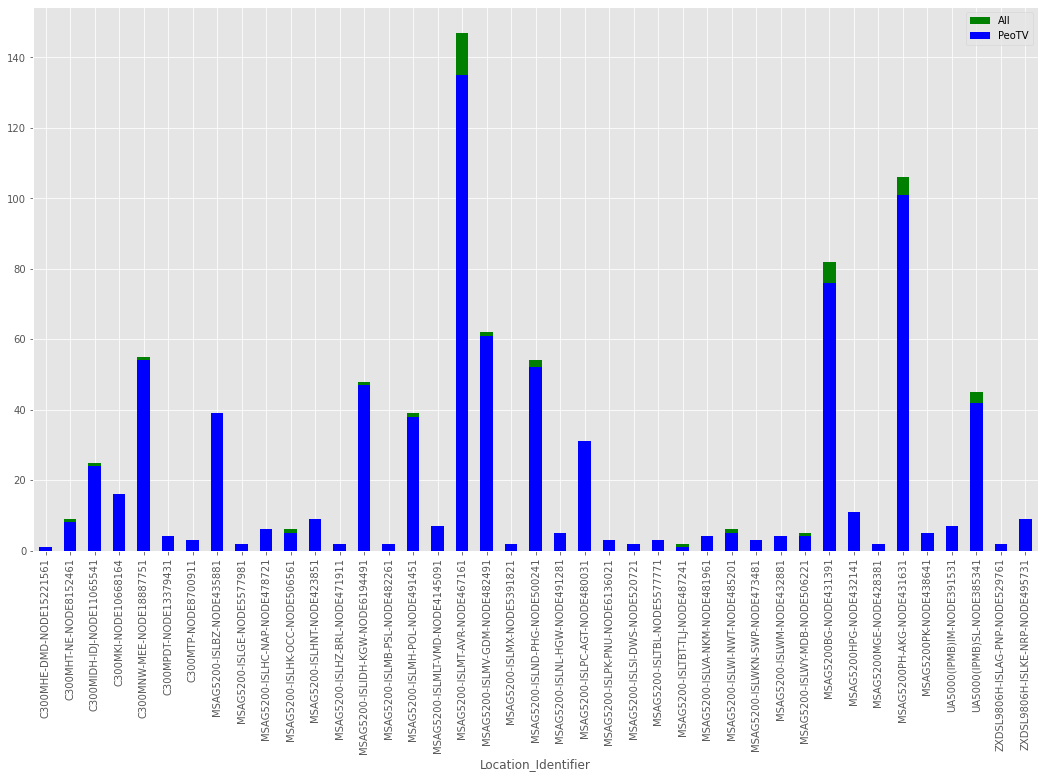

In [123]:
ax = cluster_2_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [124]:
loc_precentage=(cluster_2_peo_loc/cluster_2_loc)*100

In [125]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHE-DMD-NODE15221561           100.000000
C300MHT-NE-NODE8152461              88.888889
C300MIDH-IDJ-NODE11065541           96.000000
C300MKI-NODE10668164               100.000000
C300MNW-MEE-NODE18887751            98.181818
C300MPDT-NODE13379431              100.000000
C300MTP-NODE8700911                100.000000
MSAG5200-ISLBZ-NODE435881          100.000000
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561       83.333333
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     97.916667
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451       97.435897
MSAG5200-ISLMLT-VMD-NODE4145091    100.000000
MSAG5200-ISLMT-AVR-NODE467161       91.836735
MSAG5200-ISLMV-GDM-NODE482491       98.387097
MSAG5200-ISLMX-NODE5391821         100.000000
MSAG5200-ISLND-PHG-NODE500241       96.296296
MSAG5200-ISLNL

#### Feasible locations to offer Broadband

In [126]:
cluster_2_bb_loc = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY") | (cluster_2["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

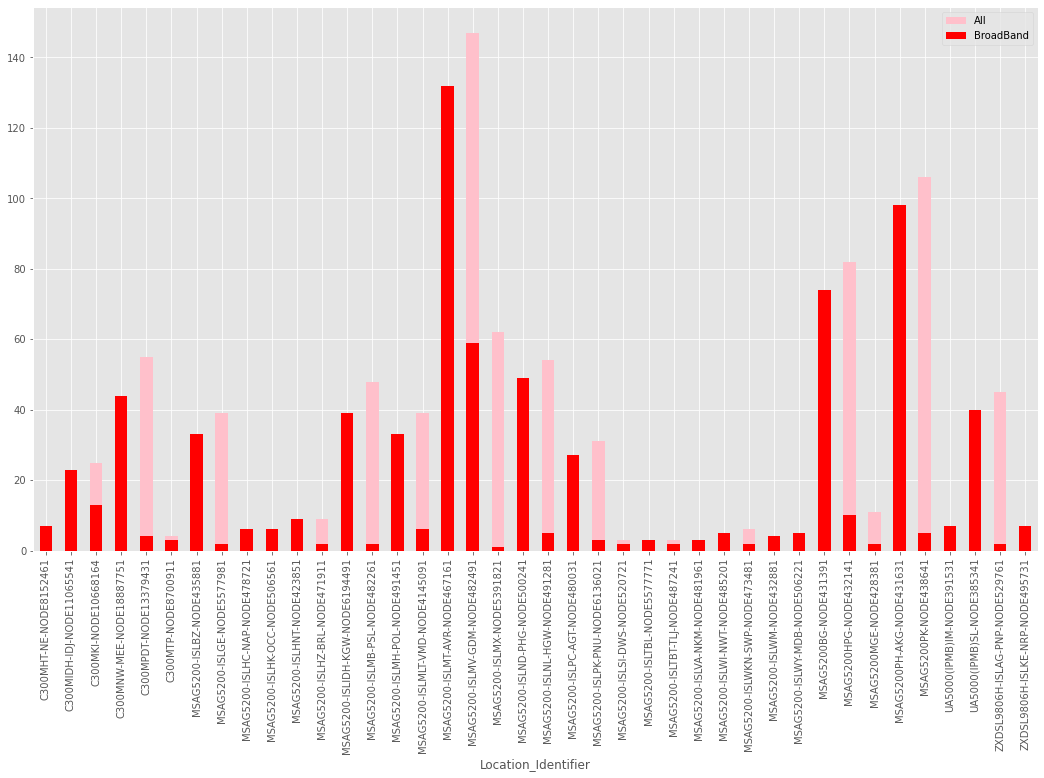

In [127]:
ax = cluster_2_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_2_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [128]:
loc_precentage=(cluster_2_bb_loc/cluster_2_loc)*100

In [129]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461              77.777778
C300MIDH-IDJ-NODE11065541           92.000000
C300MKI-NODE10668164                81.250000
C300MNW-MEE-NODE18887751            80.000000
C300MPDT-NODE13379431              100.000000
C300MTP-NODE8700911                100.000000
MSAG5200-ISLBZ-NODE435881           84.615385
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561      100.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     81.250000
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451       84.615385
MSAG5200-ISLMLT-VMD-NODE4145091     85.714286
MSAG5200-ISLMT-AVR-NODE467161       89.795918
MSAG5200-ISLMV-GDM-NODE482491       95.161290
MSAG5200-ISLND-PHG-NODE500241       90.740741
MSAG5200-ISLNL-HGW-NODE491281      100.000000
MSAG5200-ISLPC-AGT-NODE480031       87.096774
MSAG5200-ISLPK

## Cluster 2- Findings